# Credit Risk Analysis

## Import packages

1. `sys`: System-specific parameters and functions.
2. `reload` (from `imp`): Reload previously imported modules.
3. `matplotlib.pyplot`: Data visualization.
4. `numpy`: Numerical computing.
5. `pandas`: Data manipulation and analysis.
6. `seaborn`: Statistical data visualization.
7. `SimpleImputer` (from `sklearn.impute`): Handling missing data.

In [1]:
import sys

sys.path.append("..")

from imp import reload

# import matplotlib.pyplot as plt
# import numpy as np
import pandas as pd
# import seaborn as sns
# # from sklearn.impute import SimpleImputer
# # from sklearn.linear_model import LogisticRegression

# from helper_functions import config, data_utils, evaluation, plot, preprocessing
from helper_functions import data_utils, plot, preprocessing
# from helper_functions import data_utils, plot, preprocessing

C:\Users\Yessid\AppData\Local\Temp\ipykernel_15492\1610654601.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

## Import data set

After importing the data set into Python, the `app_train` is now our data frame. The data frame has a lot of functions and methods that will create specific outputs about the characteristic of data frame. The method of `columns` will print out all the column names.

In [3]:
app_train, app_test, columns_description = data_utils.get_datasets()

c:\Users\Yessid\Desktop\anyoneai\credit-risk-analysis\src\notebooks\..\helper_functions\data_utils.py:59: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  app_train = pd.read_csv(config.DATASET_TRAIN, delimiter='\t', encoding='latin1', header=None)


### Training set

In [4]:
# Columns
app_train.columns

Index(['ID_CLIENT', 'CLERK_TYPE', 'PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE',
       'QUANT_ADDITIONAL_CARDS', 'POSTAL_ADDRESS_TYPE', 'SEX',
       'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'EDUCATION_LEVEL',
       'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'NACIONALITY', 'RESIDENCIAL_STATE',
       'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE',
       'RESIDENCIAL_PHONE_AREA_CODE', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE',
       'FLAG_MOBILE_PHONE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME',
       'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS',
       'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS',
       'COMPANY', 'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY',
       'PROFESSIONAL_BOROUGH', 'FLAG_PROFESSIONAL_PHONE',
       'PROFESSIONAL_PHONE_AREA_CODE', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE',
       'OCCUPATION_TYPE', 'MATE_PROFESSION_CODE', 'EDUCATION_LEV

In [5]:
# Data dimension
print(f"Data dimension: {app_train.shape[0]} rows and {app_train.shape[1]} columns")
app_train.head()

Data dimension: 50000 rows and 54 columns


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


### Columns descriptions data

In [6]:
columns_description

,Var_Title,Var_Description,Field_Content
Var_Id,,,
1,ID_CLIENT,Sequential number for the applicant (to be use...,"1-50000, 50001-70000, 70001-90000"
2,CLERK_TYPE,Not informed,C
3,PAYMENT_DAY,"Day of the month for bill payment, chosen by t...","1,5,10,15,20,25"
4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via...,"Web, Carga"
5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the ...,"1,2,NULL"
6,POSTAL_ADDRESS_TYPE,Indicates if the address for posting is the ho...,1.2
7,SEX,NaN,"M=Male, F=Female"
8,MARITAL_STATUS,Encoding not informed,"1,2,3,4,5,6,7"
9,QUANT_DEPENDANTS,NaN,"0, 1, 2, ..."


## Data preprocessing

### Training data

#### Scale measurement

The `.info()` function will show us the metadata or information about the columns in a data frame. It undirectly specifies the scale measurement of the given columns in a data frame. However, it can be misleading. So, we must modify the scale measurement or column types based on column characteristic.

In [7]:
# Data frame metadata
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 50000 non-null  int64  
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NACIONALITY                     

In [8]:
# show numerical columns
numerical_columns = app_train.select_dtypes(include='number').columns

print(f"Number of numerical columns in the DataFrame: {len(numerical_columns)}")
print(f"List of numerical columns: \n{numerical_columns}")

Number of numerical columns in the DataFrame: 34
List of numerical columns: 
Index(['ID_CLIENT', 'PAYMENT_DAY', 'QUANT_ADDITIONAL_CARDS',
       'POSTAL_ADDRESS_TYPE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS',
       'EDUCATION_LEVEL', 'NACIONALITY', 'RESIDENCE_TYPE',
       'MONTHS_IN_RESIDENCE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME',
       'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS',
       'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS',
       'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE',
       'MATE_PROFESSION_CODE', 'EDUCATION_LEVEL', 'FLAG_HOME_ADDRESS_DOCUMENT',
       'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'PRODUCT', 'AGE',
       'TARGET_LABEL_BAD=1'],
      dtype='object')


In [9]:
# Show non numerical columns
non_numerical_columns = app_train.select_dtypes(exclude='number').columns

print(f"Number of non numerical columns in the DataFrame: {len(non_numerical_columns)}")
print(f"List of non numerical columns: \n{non_numerical_columns}")

Number of non numerical columns in the DataFrame: 20
List of non numerical columns: 
Index(['CLERK_TYPE', 'APPLICATION_SUBMISSION_TYPE', 'SEX', 'STATE_OF_BIRTH',
       'CITY_OF_BIRTH', 'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY',
       'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE',
       'RESIDENCIAL_PHONE_AREA_CODE', 'FLAG_MOBILE_PHONE', 'COMPANY',
       'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH',
       'FLAG_PROFESSIONAL_PHONE', 'PROFESSIONAL_PHONE_AREA_CODE',
       'FLAG_ACSP_RECORD', 'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3'],
      dtype='object')


In [10]:
# View 4 samples viewing all headers as a rows (transpose)
app_train.T.iloc[:, :4]

,0,1,2,3
ID_CLIENT,1,2,3,4
CLERK_TYPE,C,C,C,C
PAYMENT_DAY,5,15,5,20
APPLICATION_SUBMISSION_TYPE,Web,Carga,Web,Web
QUANT_ADDITIONAL_CARDS,0,0,0,0
POSTAL_ADDRESS_TYPE,1,1,1,1
SEX,F,F,F,F
MARITAL_STATUS,6,2,2,2
QUANT_DEPENDANTS,1,0,0,0
EDUCATION_LEVEL,0,0,0,0


### Column Description data

In [11]:
repeated_columns = (app_train.columns[app_train.columns.duplicated()].to_list())
print(f'The columns with the same name are {repeated_columns}')

The columns with the same name are ['EDUCATION_LEVEL']


- There are 2 columns with the same name "EDUCATION_LEVEL" 
- The first one is for general education level
- The second one is for mate education level
- The title of the second column will be changed to "MATE_EDUCATION_LEVEL"

In [12]:
# Changing name to the second column
preprocessing.repeated_name(app_train, columns_description)

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,...,0,0,0,0,1,N,36,591,591,1
49996,49997,C,25,0,0,1,F,1,0,0,...,0,0,0,0,2,N,21,186,186,0
49997,49998,C,5,Web,0,1,M,2,3,0,...,0,0,0,0,1,N,41,715,715,0
49998,49999,C,1,Web,0,1,F,1,1,0,...,0,0,0,0,1,N,28,320,320,1


## Exploratory Data Analysis (EDA)

### Training data

#### Distribution target column

   Value  Count  Percentage
0      0  36959      73.918
1      1  13041      26.082


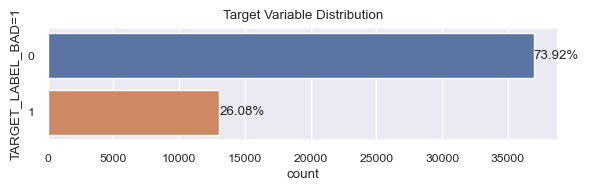

In [13]:
plot.plot_target_variable_distribution(app_train, "TARGET_LABEL_BAD=1")

#### Distribution number of columns of each data type

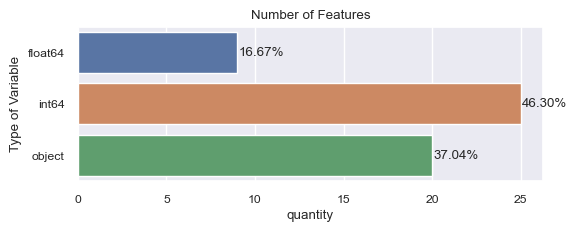

In [14]:
plot.plot_data_type_counts(app_train)

#### Distribution of uniques values for categorical columns

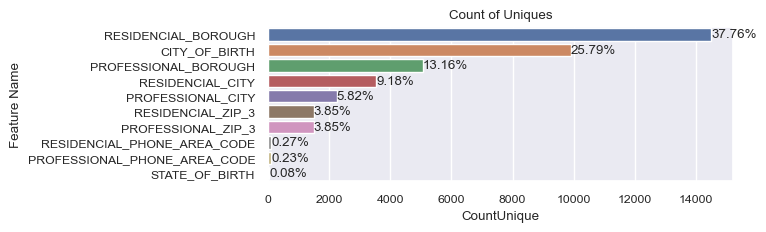

In [15]:
plot.plot_unique_value_counts(app_train)

#### Distribution percentage of missing data for each column

+----------------------+---------------+
|        Column        | Missing Count |
+----------------------+---------------+
|    RESIDENCE_TYPE    |     1349      |
| MONTHS_IN_RESIDENCE  |     3777      |
|  PROFESSIONAL_CITY   |     33783     |
| PROFESSIONAL_BOROUGH |     33783     |
|   PROFESSION_CODE    |     7756      |
|   OCCUPATION_TYPE    |     7313      |
| MATE_PROFESSION_CODE |     28884     |
| MATE_EDUCATION_LEVEL |     32338     |
+----------------------+---------------+


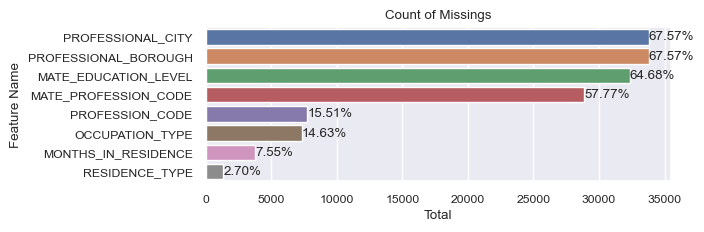

In [16]:
plot.display_missing_values(app_train)
plot.plot_missing_data(app_train)

#### Handle missing values

**Note**: Our consideration to remove missing values is based on a business logic. The concept of *garbage in garbage out* applies. Without any relevant domain knowledges of loan problem, the interpolation will lead to a biased result.

Instead of dropping the missing values brutally, we try to inspect the relevant variables in the data in order to suggest the consideration for the next analysis.

#### Analyzing distribution of variables
- Show distribution of credit amounts

* Analyzing PERSONAL_MONTHLY_INCOME
  * It is the applicant's personal regular monthly income in Brazilian currency (R$)
  * It will be cast to (dollars$)

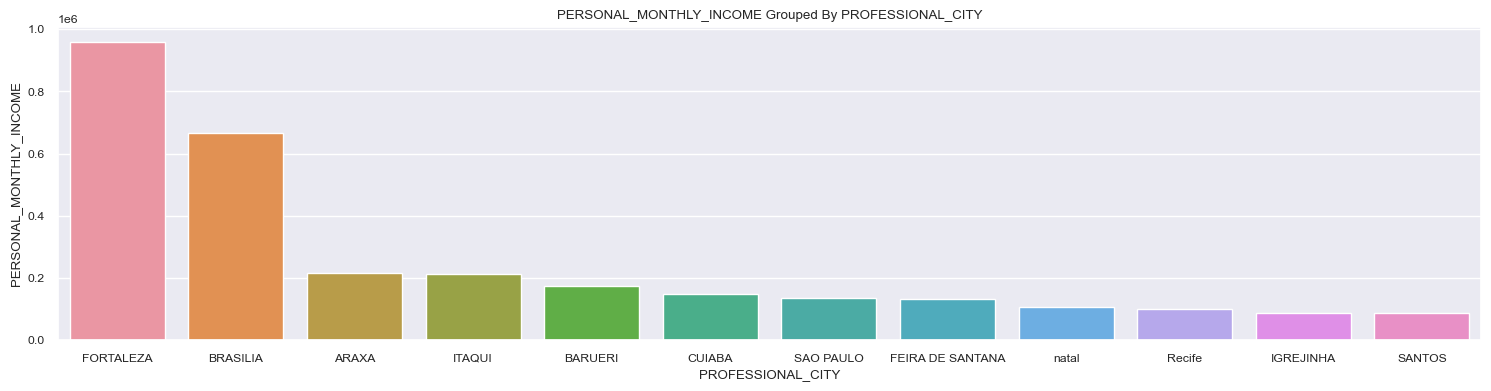

In [17]:
# left as information of revenue per city
plot.plot_income_by_other_column(app_train, "PERSONAL_MONTHLY_INCOME", "PROFESSIONAL_CITY")

### Analyzing Numerical columns

#### Show unique values from numerical columns

In [18]:
preprocessing.unique_numerical(app_train, columns_description)

Feature Name                    UniqueCount    RangeMeta

ID_CLIENT                       50000          1-50000, 50001-70000, 70001-90000
PAYMENT_DAY                     6              1,5,10,15,20,25
QUANT_ADDITIONAL_CARDS          1              1,2,NULL
POSTAL_ADDRESS_TYPE             2              1.2
MARITAL_STATUS                  8              1,2,3,4,5,6,7
QUANT_DEPENDANTS                17             0, 1, 2, ...
EDUCATION_LEVEL                 1              1,2,3,4,5
NACIONALITY                     3              0, 1, 2
RESIDENCE_TYPE                  7              1,2,3,4,5,NULL
MONTHS_IN_RESIDENCE             89             1,2,... , NULL
FLAG_EMAIL                      2              0.1
PERSONAL_MONTHLY_INCOME         5495           nan
OTHER_INCOMES                   615            nan
FLAG_VISA                       2              0.1
FLAG_MASTERCARD                 2              0.1
FLAG_DINERS                     2              0.1
FLAG_AMERICAN_EXPRESS       

## Normalization

- Before starting the EDA process, we are going to create a new df, which contains all the information already normalized. This is done to show the behaviour before and after the normalizing process.

In [19]:
# clonning data and normalizing data
app_train_cop, target_col = preprocessing.normalized_data(app_train)

### Cleaning Data

#### Working on Numerical Data

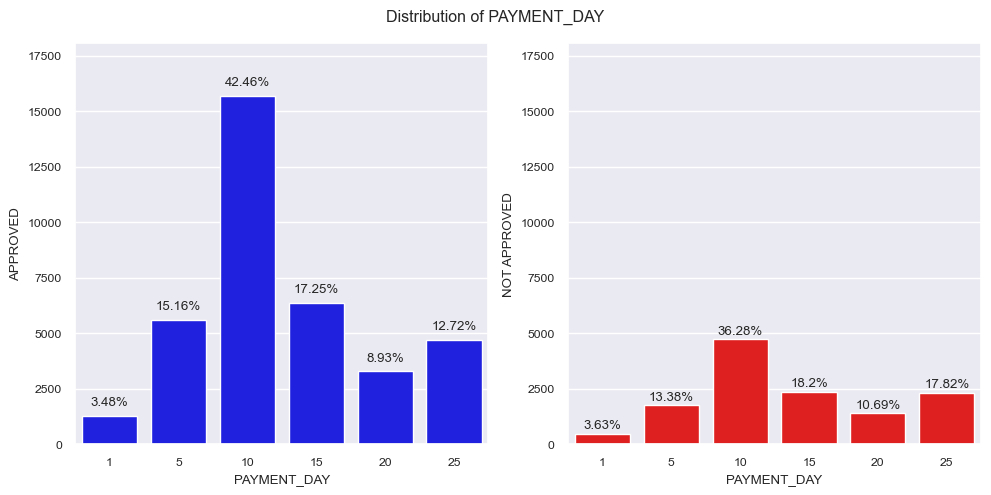

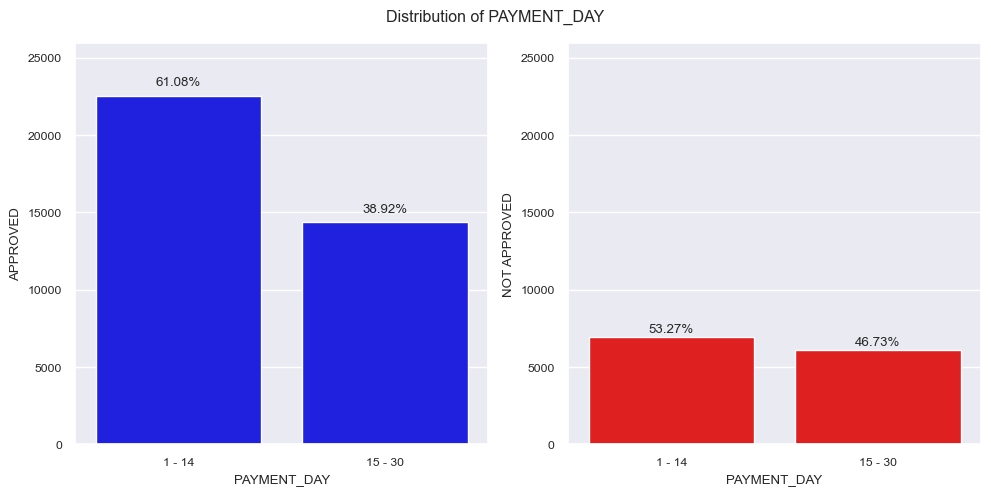

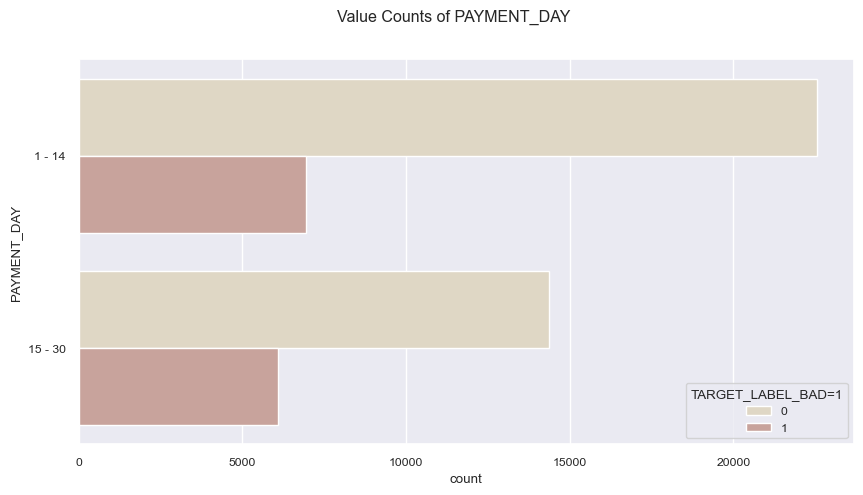

In [20]:
#'PAYMENT_DAY' : split every 15 days --> ["1 - 14", 1:"15 - 30"]
plot.plotting_distribution_bar(app_train, 'PAYMENT_DAY', 'horizontal') # before normalizing
plot.plotting_distribution_bar(app_train_cop, 'PAYMENT_DAY', 'horizontal') # after normalizing
plot.plot_value_counts(app_train_cop, 'PAYMENT_DAY') # after normalizing

In [21]:
# 'MARITAL_STATUS': relation between age and marital status to set the codes.
print("Relationship between Age and Marital Status")
app_train[["AGE", "MARITAL_STATUS"]].groupby(["MARITAL_STATUS"]).median()

# if age is 35 years old -> single (a single person has few years old)
# if age is 42 years old -> married (a married person has more years old)

Relationship between Age and Marital Status


,AGE
MARITAL_STATUS,
0,38.0
1,35.0
2,42.0
3,50.0
4,62.0
5,48.0
6,35.0
7,48.0


#### Marital Status Code in Brazil
- regards to this [standard](https://international.ipums.org/international-action/variables/MARST#codes_section)

|code|marital status|
|---|---------------|
|0| NIU (not in universe)|
|1|	Single/never married *|	
|2|	Married/in union *|
|3|	Separated/divorced/spouse absent|
|4|	Widowed|

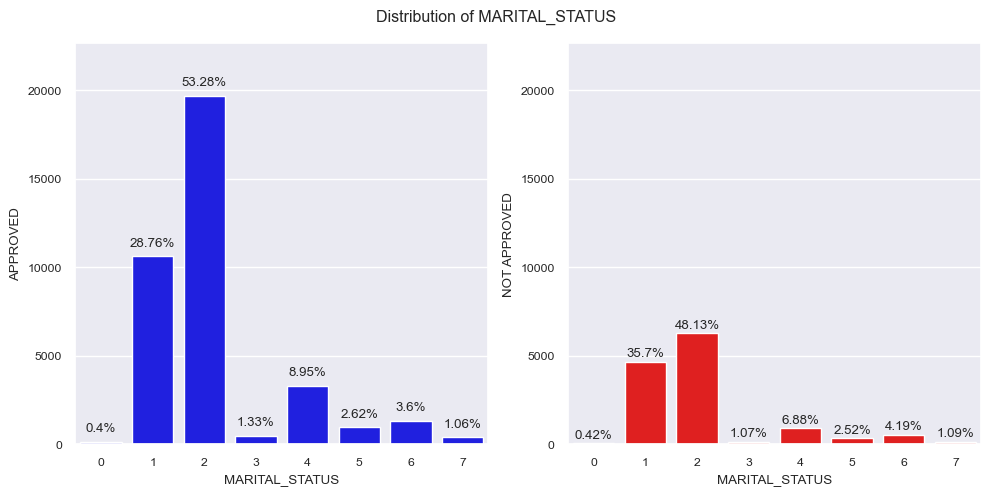

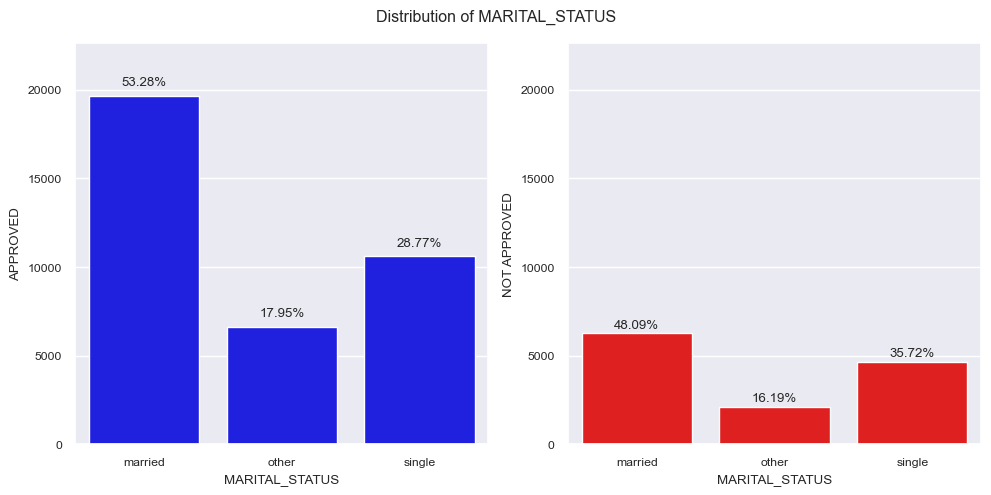

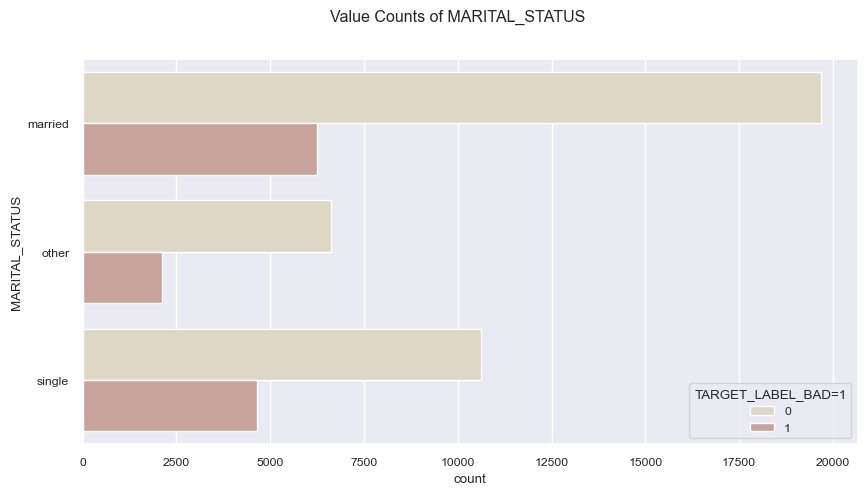

In [22]:
# 'MARITAL_STATUS'
reload(plot)
plot.plotting_distribution_bar(app_train, 'MARITAL_STATUS', 'horizontal') # before changes
plot.plotting_distribution_bar(app_train_cop, 'MARITAL_STATUS', 'horizontal') # before changes
plot.plot_value_counts(app_train_cop, 'MARITAL_STATUS') # after changes

In [23]:
app_train_cop['QUANT_DEPENDANTS'].unique()

[1, 0, 2, 3]
Categories (4, int64): [0, 1, 2, 3]

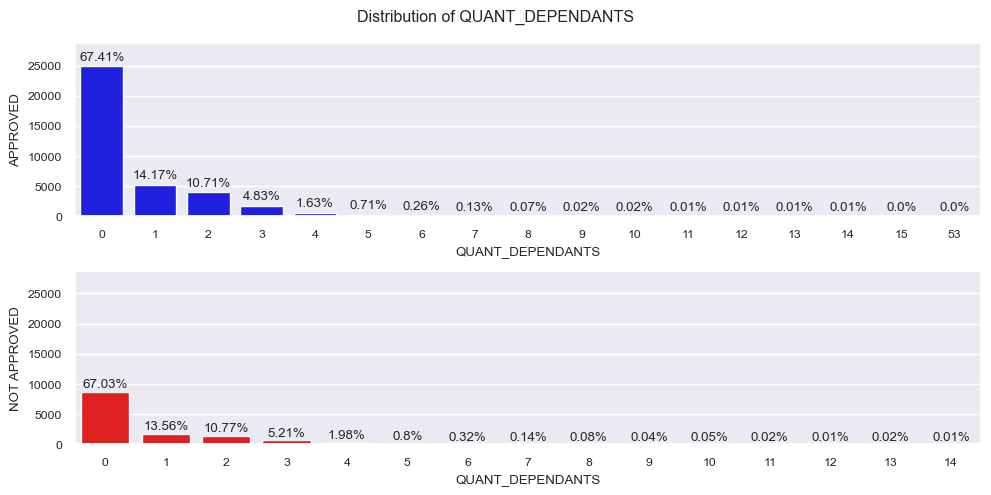

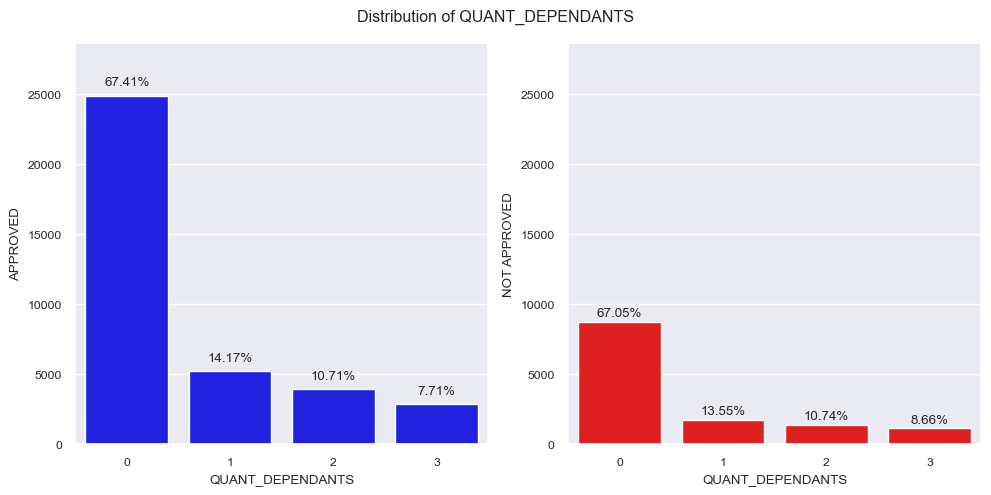

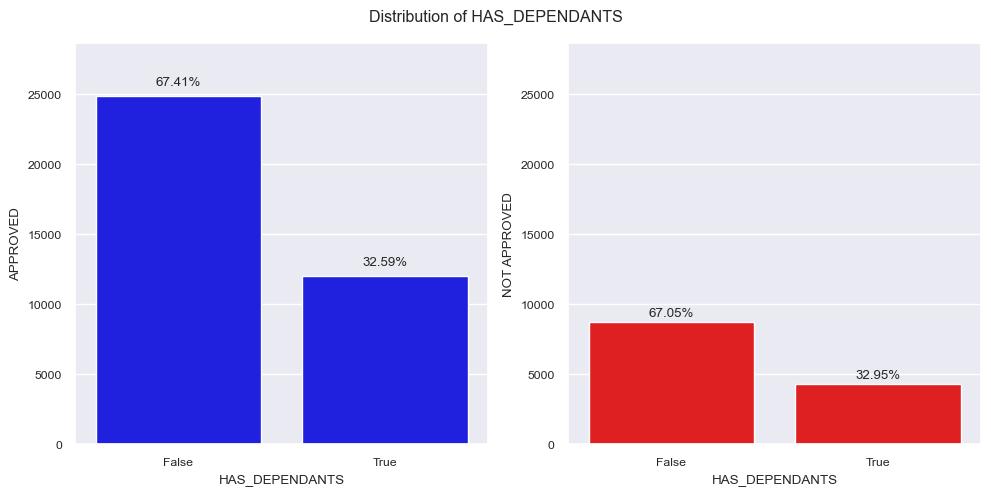

In [24]:
# 'QUANT_DEPENDANTS': summarized, in range [0,1,2,3+]
plot.plotting_distribution_bar(app_train, 'QUANT_DEPENDANTS') # before cleaning

plot.plotting_distribution_bar(app_train_cop, 'QUANT_DEPENDANTS', 'horizontal') # after normalizing
plot.plotting_distribution_bar(app_train_cop, 'HAS_DEPENDANTS', 'horizontal') # after normalizing

In [25]:
app_train_cop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49935 entries, 0 to 49999
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID_CLIENT                       49935 non-null  category
 1   CLERK_TYPE                      49935 non-null  category
 2   PAYMENT_DAY                     49935 non-null  category
 3   APPLICATION_SUBMISSION_TYPE     49935 non-null  category
 4   QUANT_ADDITIONAL_CARDS          49935 non-null  category
 5   POSTAL_ADDRESS_TYPE             49935 non-null  category
 6   SEX                             49935 non-null  category
 7   MARITAL_STATUS                  49935 non-null  category
 8   QUANT_DEPENDANTS                49935 non-null  category
 9   EDUCATION_LEVEL                 49935 non-null  category
 10  STATE_OF_BIRTH                  49935 non-null  category
 11  CITY_OF_BIRTH                   49935 non-null  category
 12  NACIONALITY       

In [26]:
app_train_cop['HAS_RESIDENCE'].unique()

<BooleanArray>
[True, False]
Length: 2, dtype: boolean

RESIDENCE_TYPE  RESIDENCE_TYPE
0.0             0.0                 760
1.0             1.0               41572
2.0             2.0                3884
3.0             3.0                 141
4.0             4.0                 311
5.0             5.0                1983
Name: RESIDENCE_TYPE, dtype: int64


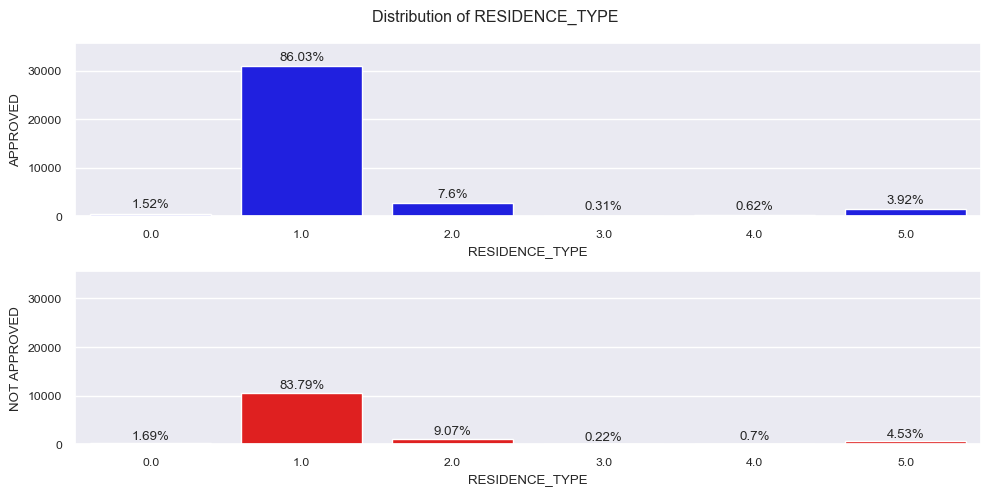

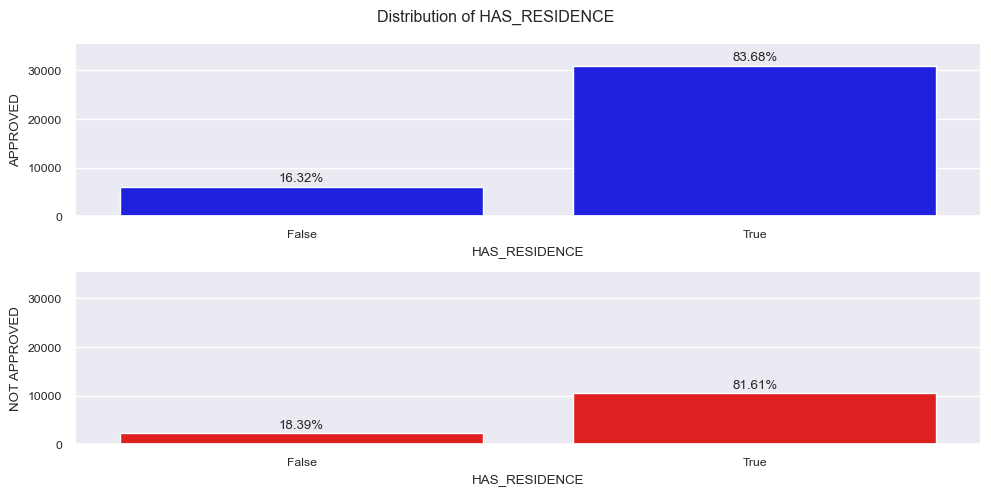

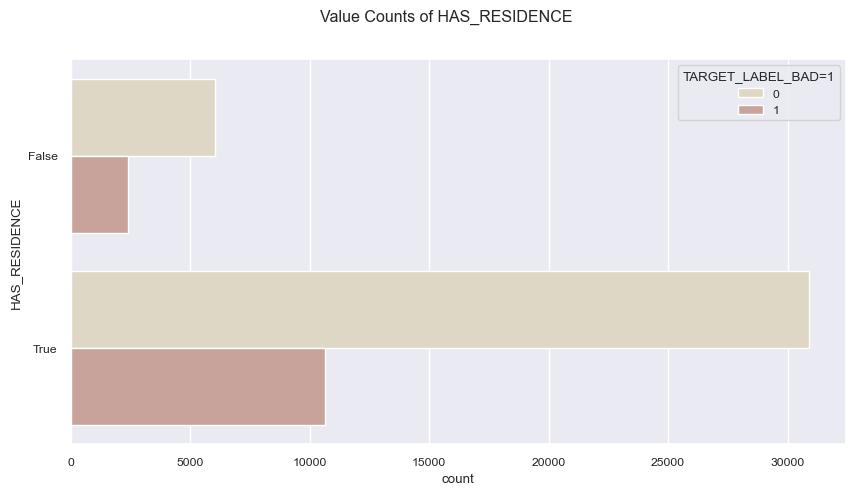

In [27]:
# 'RESIDENCE_TYPE': categoric, {1:TRUE, !=1:False}
print(app_train.groupby('RESIDENCE_TYPE')['RESIDENCE_TYPE'].value_counts())
# Until september of 2021, the average of owner residence is nearly 57%
# So for this dataframe, is good to assume that 1 is for owners and the oth

app_train['RESIDENCE_TYPE'].fillna(0) # 1349 null values

plot.plotting_distribution_bar(app_train, 'RESIDENCE_TYPE', 'vertical') # before cleaning
plot.plotting_distribution_bar(app_train_cop, 'HAS_RESIDENCE', 'vertical') # before cleaning
plot.plot_value_counts(app_train_cop, 'HAS_RESIDENCE') # after normalizing

- Regards to this Concepts [Normalization or Imputation:](https://stats.stackexchange.com/questions/138203/imputation-of-missing-data-before-or-after-centering-and-scaling)
    - If normalizing the data before imputation, the imputed values ​​will better fit the distribution of the original data, since only the raw values ​​are used for the calculation of statistics, such as the mean or median, needed for the imputation.
    - If missing values ​​are first imputed and then the data is normalized, the imputed values ​​will also be affected by the normalization, which can alter the original distribution of the data and thus introduce biases in the imputed values.

* Regards to this Concepts [Scale with outliers:](https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/#:~:text=Standardization%20is%20calculated%20by%20subtracting,dividing%20by%20the%20standard%20deviation.&text=Sometimes%20an%20input%20variable%20may,are%20overrepresented%20for%20some%20reason.)
    - The Robust Scaler is a standardization technique that uses the interquartile range to make features have a mean of zero and a standard deviation of one, while being resistant to the effects of outliers. In addition, the size of the interquartile range can be adjusted to control the sensitivity of the method to outliers.


## Outliers detection

##### Helper functions to treats outliers

In [28]:
# 'MONTHS_IN_RESIDENCE': looking for a relationship between target and this column divided every 6 months
print("Relationship between Target and Months in Residence")
app_train[["TARGET_LABEL_BAD=1", "MONTHS_IN_RESIDENCE"]].groupby(["MONTHS_IN_RESIDENCE"]).count()[::6]
# app_train[["TARGET_LABEL_BAD=1", "MONTHS_IN_RESIDENCE"]].groupby(["TARGET_LABEL_BAD=1"]).value_counts()[::6]

Relationship between Target and Months in Residence


,TARGET_LABEL_BAD=1
MONTHS_IN_RESIDENCE,
0.0,4695
6.0,1605
12.0,1121
18.0,589
24.0,254
30.0,1166
36.0,106
42.0,49
48.0,32


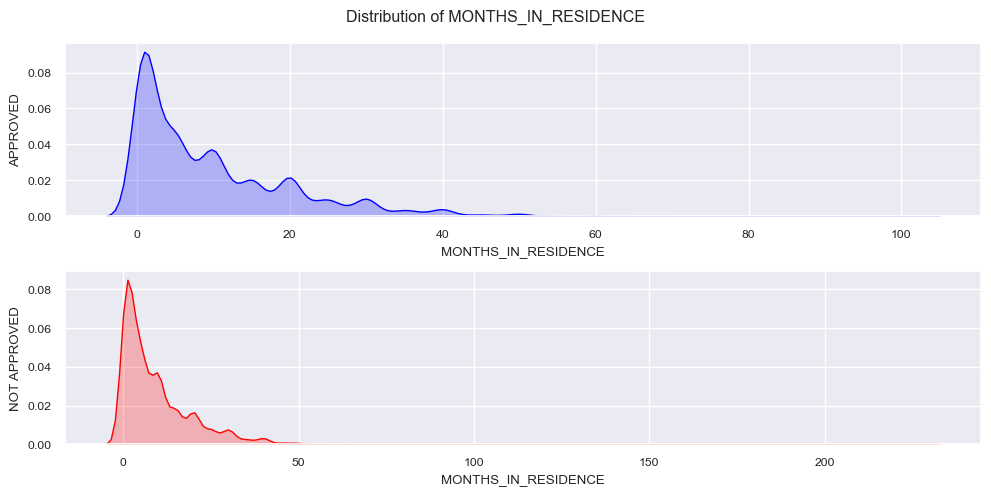

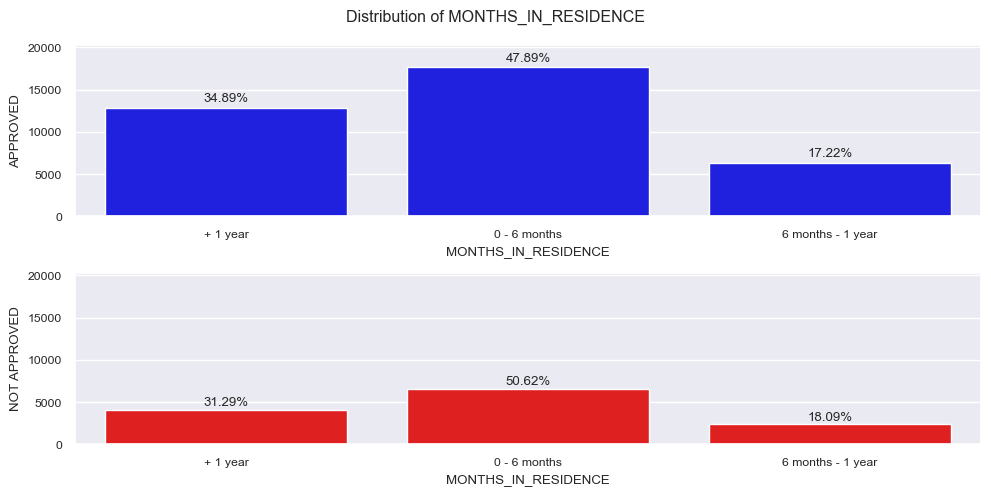

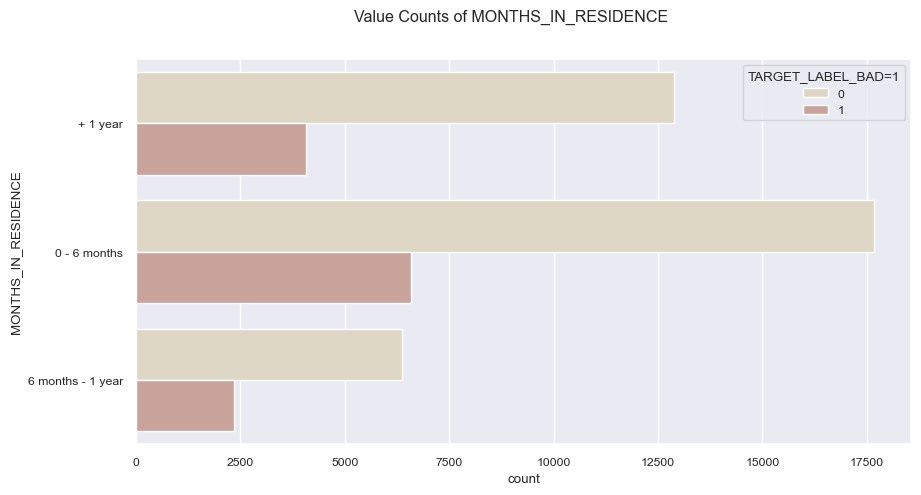

In [29]:
plot.plotting_distribution_kde(app_train, "MONTHS_IN_RESIDENCE") # before cleaning
plot.plotting_distribution_bar(app_train_cop, "MONTHS_IN_RESIDENCE") # before cleaning
plot.plot_value_counts(app_train_cop, "MONTHS_IN_RESIDENCE")

#### Minimal Wage in Brazil
[Minimal Wage](https://www.remoti.io/blog/average-salary-in-brazil#:~:text=Minimum%20Wage,around%201.67%20USD%20per%20hour.). 
|Type of salary in Br|BRL/R$|
|--------------------|-----|
|minimum montlhy wage| 1320|
|average monthly cost of living| 3323|
|average monthly salary| 8560|
|highest-paid salary| 38200|

range of income achieve more than highest paid, it could be more than 40'000

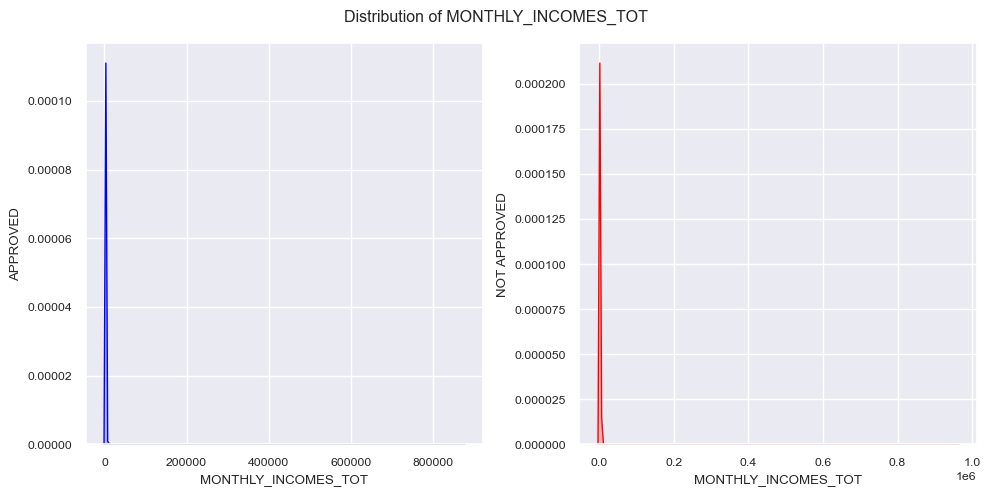

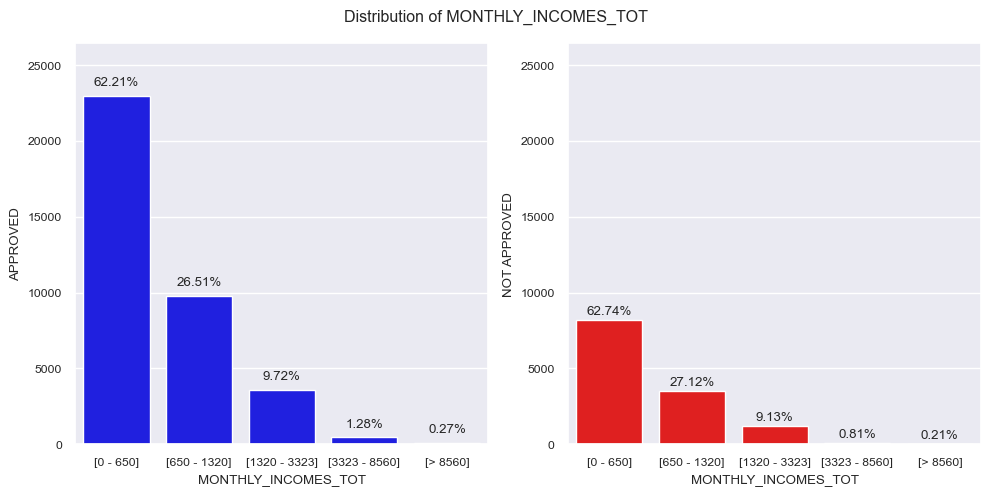

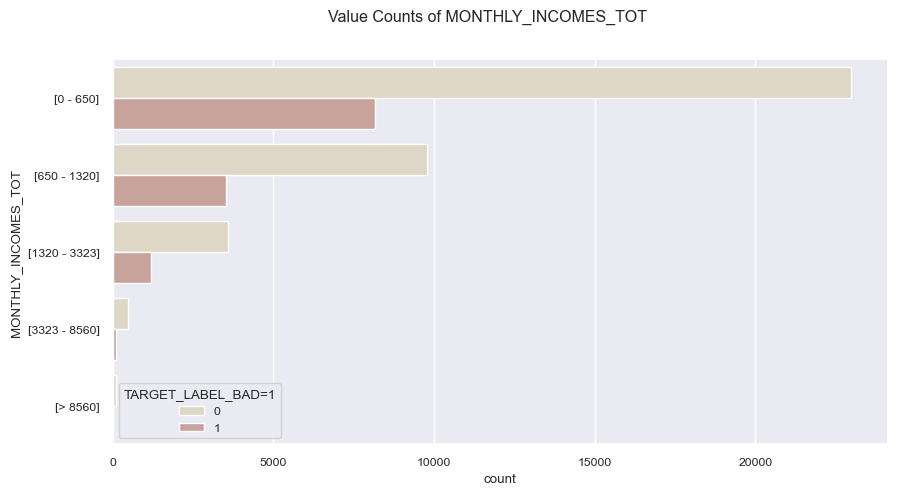

In [30]:
# "PERSONAL_MONTHLY_INCOME" and "OTHER_INCOMES" joined as "MONTHLY_INCOMES_TOT"
app_train["MONTHLY_INCOMES_TOT"] = (app_train["PERSONAL_MONTHLY_INCOME"] + app_train["OTHER_INCOMES"])

plot.plotting_distribution_kde(app_train, "MONTHLY_INCOMES_TOT", "horizontal") # before cleaning
plot.plotting_distribution_bar(app_train_cop, "MONTHLY_INCOMES_TOT", "horizontal") # after cleaning
plot.plot_value_counts(app_train_cop, "MONTHLY_INCOMES_TOT") # after cleaning

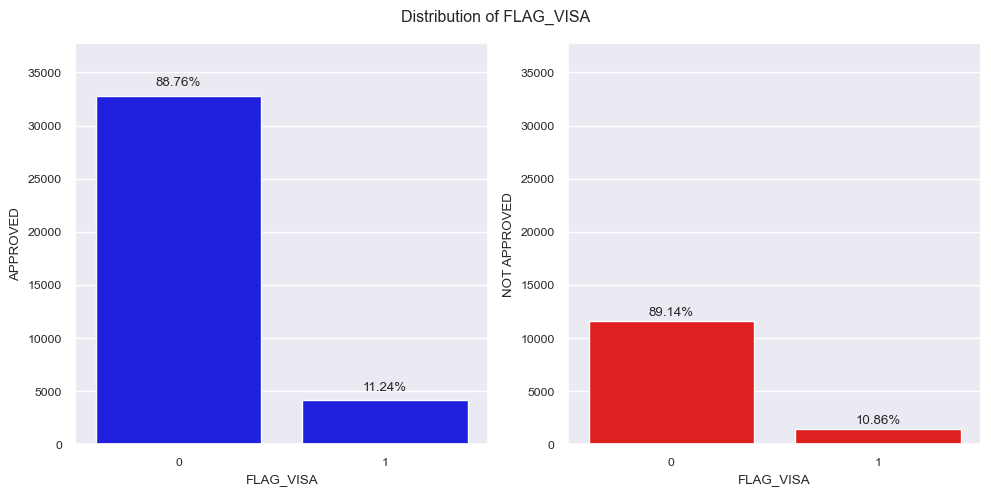

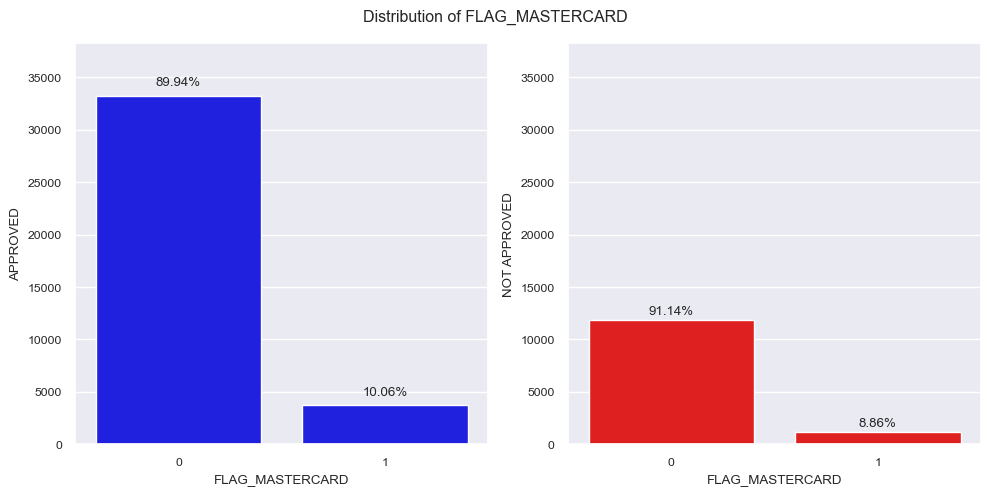

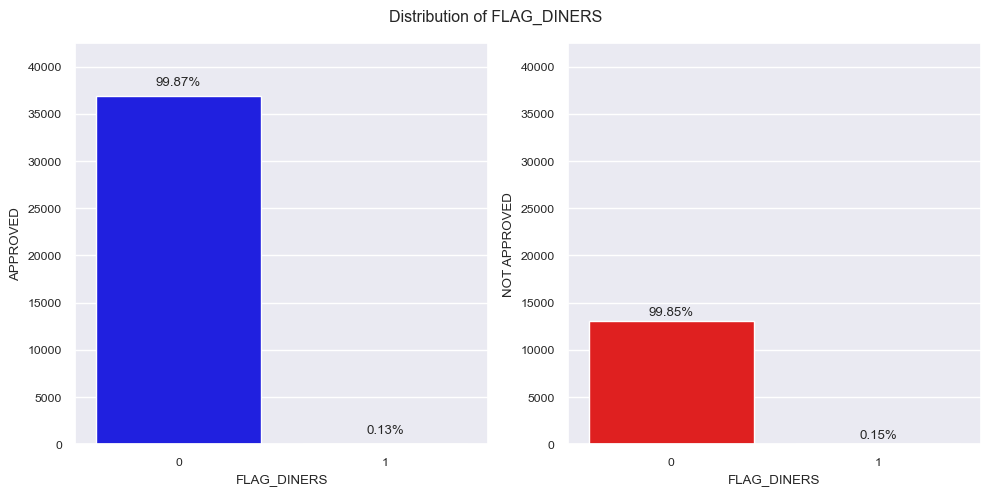

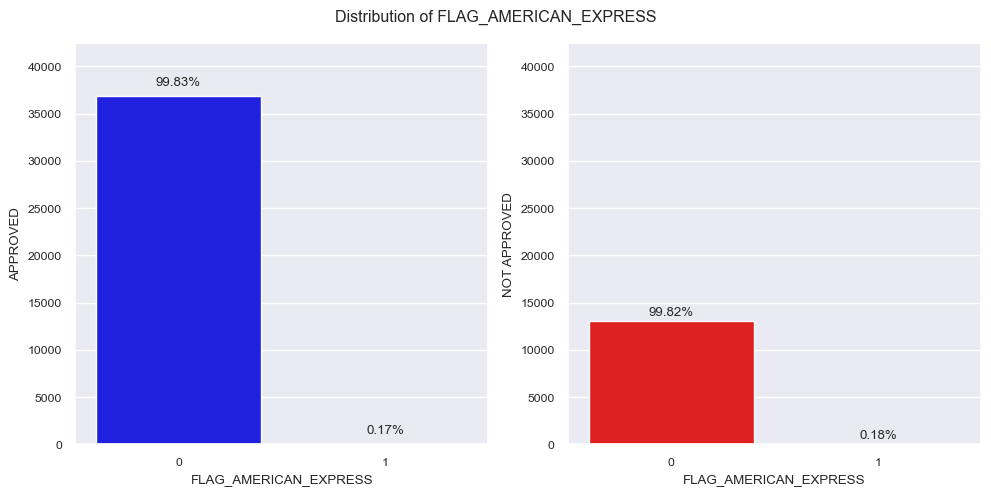

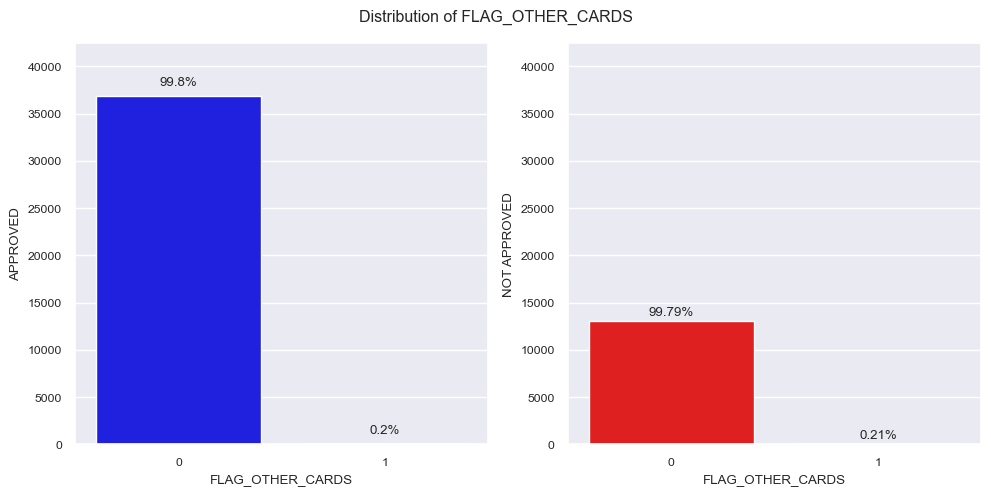

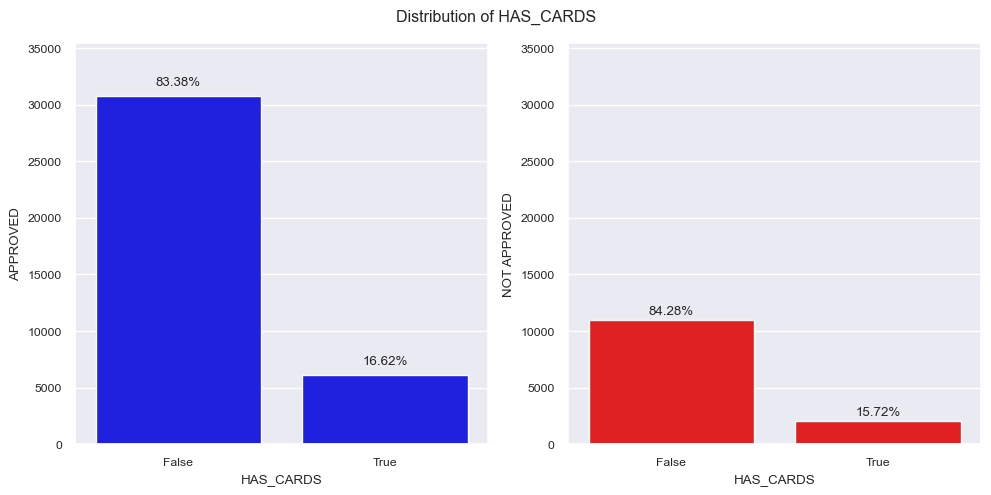

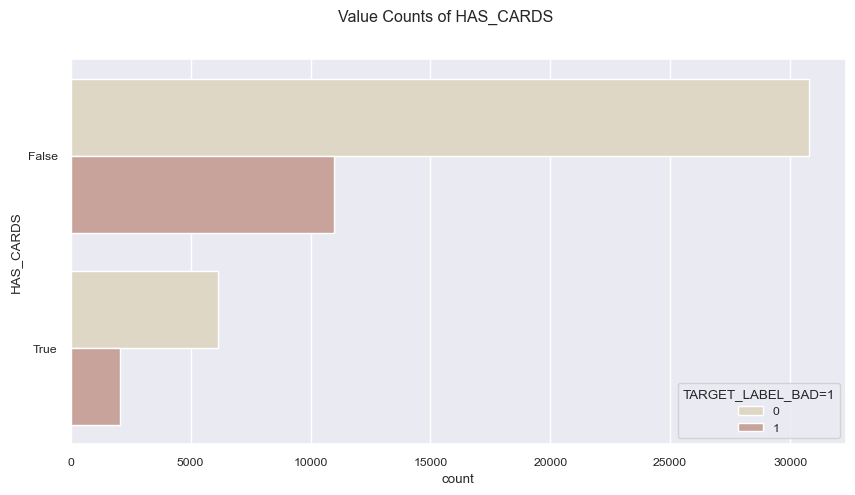

In [31]:
# 'FLAG_CARDS': New categorical column to delete the following:
# 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS'
plot.plotting_distribution_bar(app_train, "FLAG_VISA", "horizontal") # before cleaning
plot.plotting_distribution_bar(app_train, "FLAG_MASTERCARD", "horizontal") # before cleaning
plot.plotting_distribution_bar(app_train, "FLAG_DINERS", "horizontal") # before cleaning
plot.plotting_distribution_bar(app_train, "FLAG_AMERICAN_EXPRESS", "horizontal") # before cleaning
plot.plotting_distribution_bar(app_train, "FLAG_OTHER_CARDS", "horizontal") # before cleaning

plot.plotting_distribution_bar(app_train_cop, 'HAS_CARDS', "horizontal") # after cleaning
plot.plot_value_counts(app_train_cop, 'HAS_CARDS') # after cleaning

In [32]:
# 'QUANT_BANKING_ACCOUNTS' and 'QUANT_SPECIAL_BANKING_ACCOUNTS' added to 'QUANT_BANKING_ACCOUNTS'
# could be influenced on target variable
app_train['QUANT_BANKING_ACCOUNTS'] = (app_train_cop["QUANT_BANKING_ACCOUNTS"] + app_train_cop["QUANT_SPECIAL_BANKING_ACCOUNTS"])

plot.plotting_distribution_bar(app_train, 'QUANT_BANKING_ACCOUNTS', "horizontal") # before cleaning
plot.plotting_distribution_bar(app_train_cop, 'HAS_BANKING_ACCOUNTS', "horizontal") # after cleaning
plot.plot_value_counts(app_train_cop, 'HAS_BANKING_ACCOUNTS') # after cleaning

TypeError: unsupported operand type(s) for +: 'Categorical' and 'Categorical'

In [ ]:
# 'PERSONAL_ASSETS_VALUE': achieves range from [0 to 6'000'000] of R$
# Could be numerical value but with coded weight
curr_col_name = "PERSONAL_ASSETS_VALUE"
app_train_cop[["TARGET_LABEL_BAD=1", curr_col_name]].groupby([curr_col_name]).count()[::10]

,TARGET_LABEL_BAD=1
PERSONAL_ASSETS_VALUE,
0.0,47547
27.0,1
60.0,1
260.0,2
4000.0,6
8300.0,2
12000.0,44
18000.0,34
25000.0,198


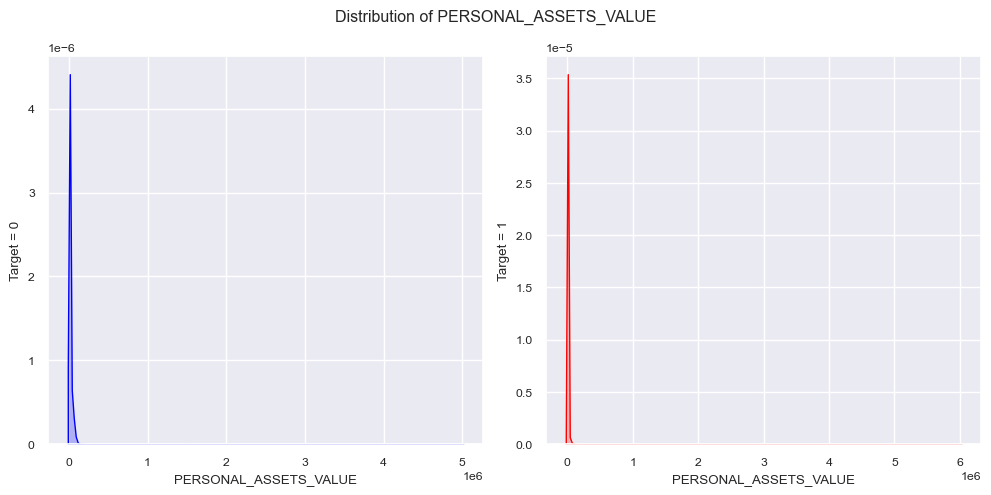

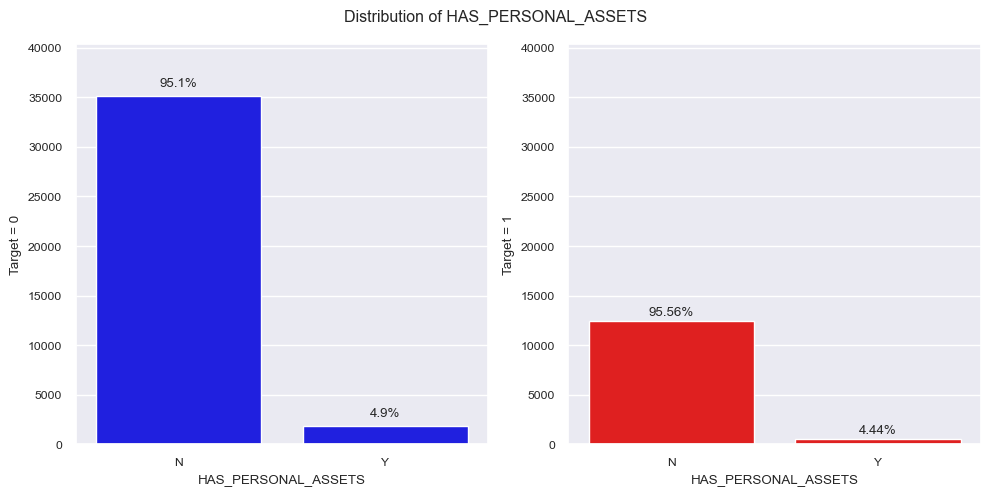

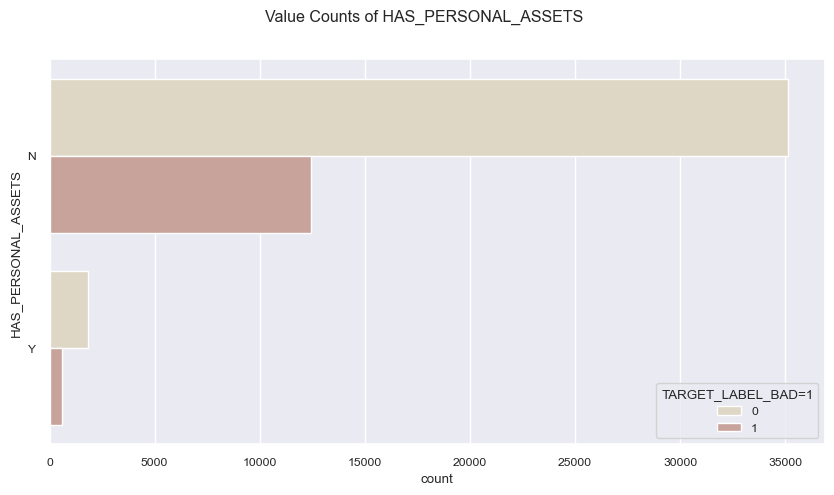

In [ ]:
# 'PERSONAL_ASSETS_VALUE': changed to 'HAS_PERSONAL_ASSETS' Y and N values (pending to delete)
plot.plotting_distribution_kde(app_train, 'PERSONAL_ASSETS_VALUE', "horizontal") # before cleaning

plot.plotting_distribution_bar(app_train_cop, 'HAS_PERSONAL_ASSETS', "horizontal") # after cleaning
plot.plot_value_counts(app_train_cop, 'HAS_PERSONAL_ASSETS') # after cleaning

            TARGET_LABEL_BAD=1
QUANT_CARS                    
0                        33193
1                        16807


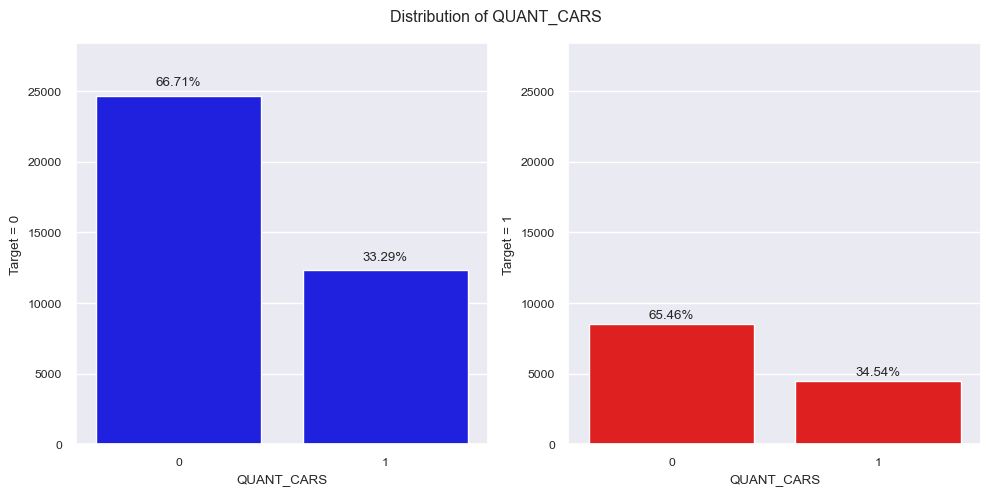

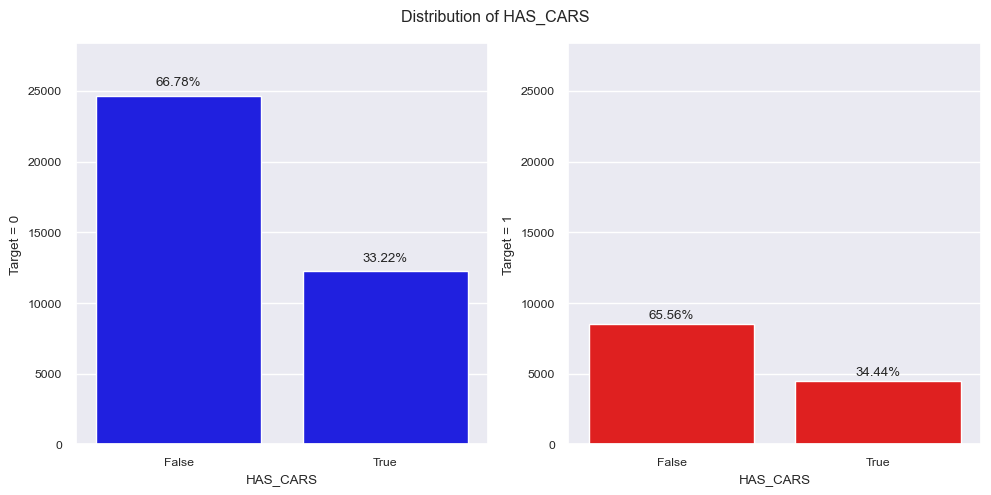

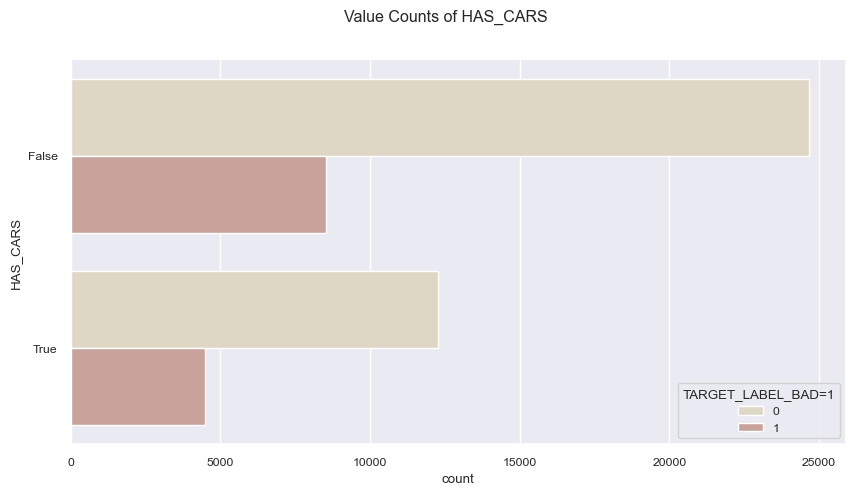

In [ ]:
# 'QUANT_CARS' changed to 'HAS_CAR': categorical (Y, N)
print(app_train[["TARGET_LABEL_BAD=1", "QUANT_CARS"]].groupby(["QUANT_CARS"]).count())

# before cleaning
plot.plotting_distribution_bar(app_train, 'QUANT_CARS', "horizontal") # before cleaning
plot.plotting_distribution_bar(app_train_cop, 'HAS_CARS', "horizontal") # after cleaning
plot.plot_value_counts(app_train_cop, 'HAS_CARS') # after cleaning

         TARGET_LABEL_BAD=1
COMPANY                    
N                     27959
Y                     22041


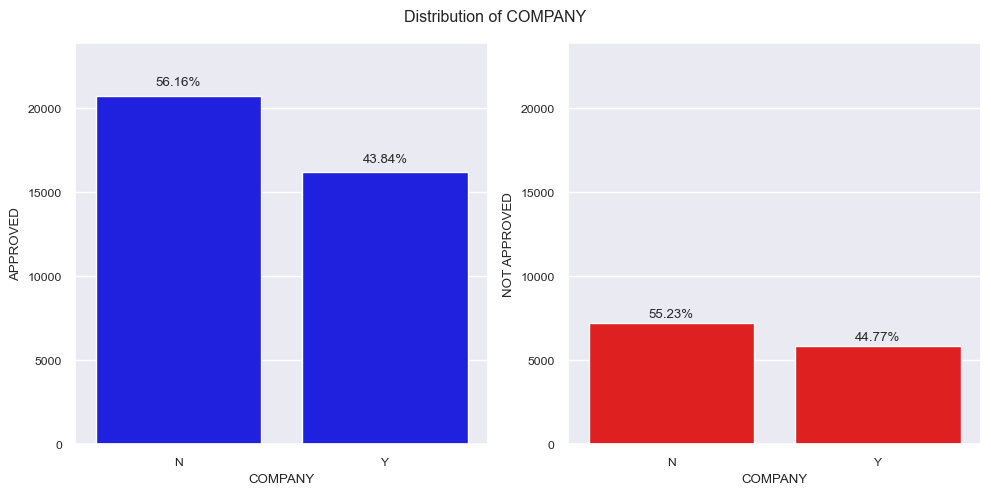

In [ ]:
# 'COMPANY' no changes, it has a good proportion
reload(plot)
print(app_train[["TARGET_LABEL_BAD=1", "COMPANY"]].groupby(["COMPANY"]).count())

plot.plotting_distribution_bar(app_train, 'COMPANY', "horizontal")

#### Working on categorical columns

#### Show unique values from categorical columns

In [ ]:
preprocessing.unique_categorical(app_train, columns_description)

Feature Name                    UniqueCount    RangeMeta

CLERK_TYPE                      1              C
APPLICATION_SUBMISSION_TYPE     3              Web, Carga
SEX                             4              M=Male, F=Female
STATE_OF_BIRTH                  29             Brazilian states, XX, missing
CITY_OF_BIRTH                   9910           nan
RESIDENCIAL_STATE               27             nan
RESIDENCIAL_CITY                3529           nan
RESIDENCIAL_BOROUGH             14511          nan
FLAG_RESIDENCIAL_PHONE          2              Y,N
RESIDENCIAL_PHONE_AREA_CODE     102            nan
FLAG_MOBILE_PHONE               1              Y,N
COMPANY                         2              Y,N
PROFESSIONAL_STATE              28             nan
PROFESSIONAL_CITY               2237           nan
PROFESSIONAL_BOROUGH            5058           nan
FLAG_PROFESSIONAL_PHONE         2              Y,N
PROFESSIONAL_PHONE_AREA_CODE    87             nan
FLAG_ACSP_RECORD               

TARGET_LABEL_BAD=1  APPLICATION_SUBMISSION_TYPE
0                   Web                            20926
                    0                              14224
                    Carga                           1809
1                   Web                             7280
                    0                               5237
                    Carga                            524
dtype: int64


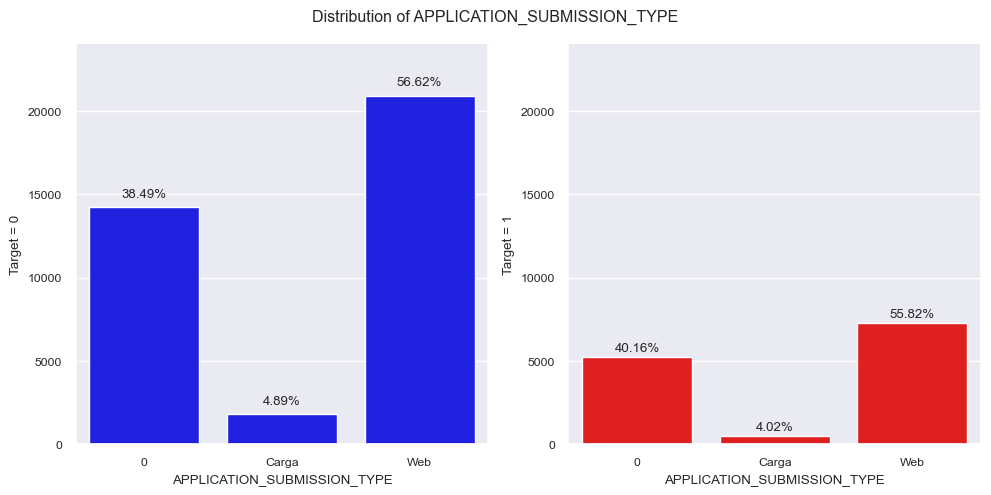

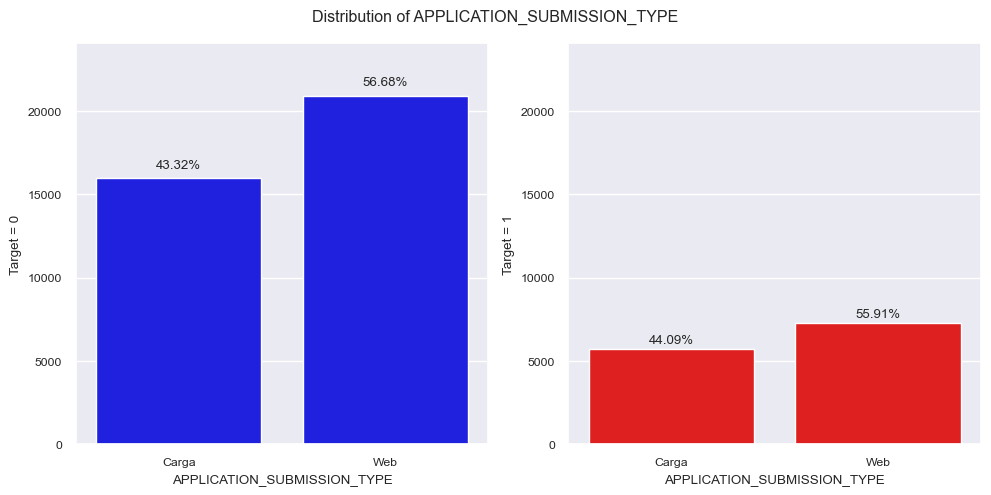

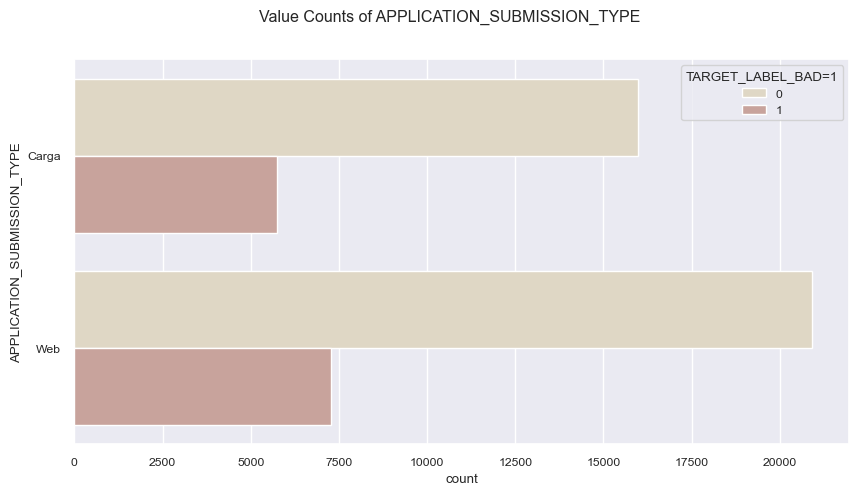

In [ ]:
# 'APPLICATION_SUBMISSION_TYPE': 0 value is disposed as other
print(app_train[["TARGET_LABEL_BAD=1", "APPLICATION_SUBMISSION_TYPE"]].groupby(["TARGET_LABEL_BAD=1"]).value_counts())

plot.plotting_distribution_bar(app_train, "APPLICATION_SUBMISSION_TYPE", 'horizontal') # before cleaning
plot.plotting_distribution_bar(app_train_cop, "APPLICATION_SUBMISSION_TYPE", 'horizontal') # after cleaning
plot.plot_value_counts(app_train_cop, 'APPLICATION_SUBMISSION_TYPE') # after normalizing

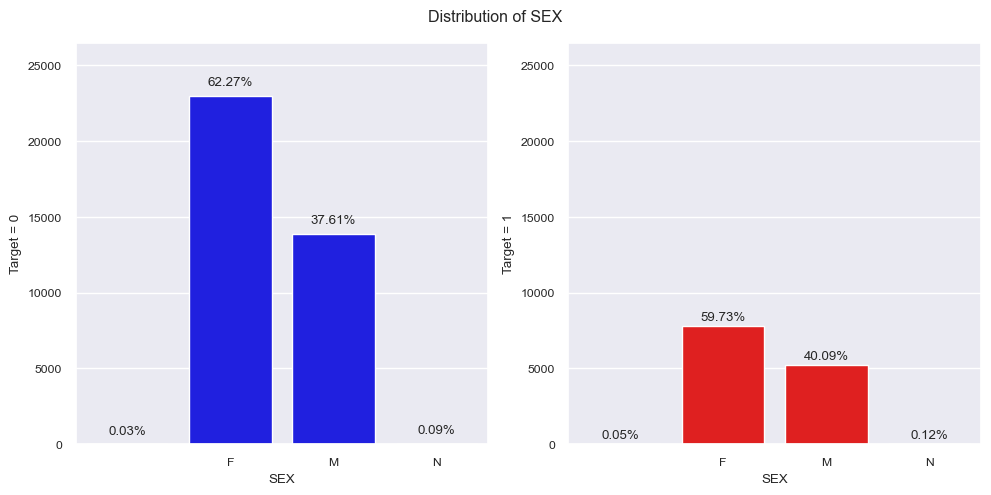

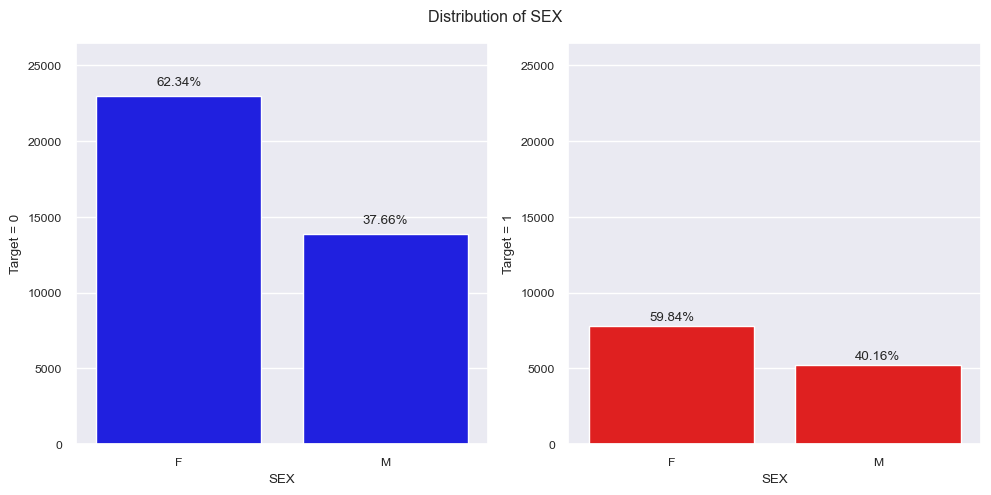

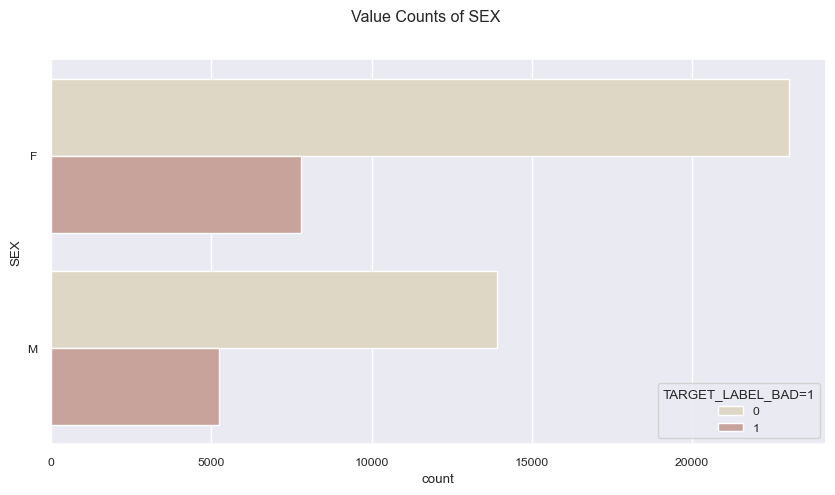

In [ ]:
# 'SEX': values different for 'M', 'F' will be deleted.
plot.plotting_distribution_bar(app_train, "SEX", 'horizontal') # before cleaning
plot.plotting_distribution_bar(app_train_cop, "SEX", 'horizontal') # after cleaning
plot.plot_value_counts(app_train_cop, 'SEX') # after normalizing

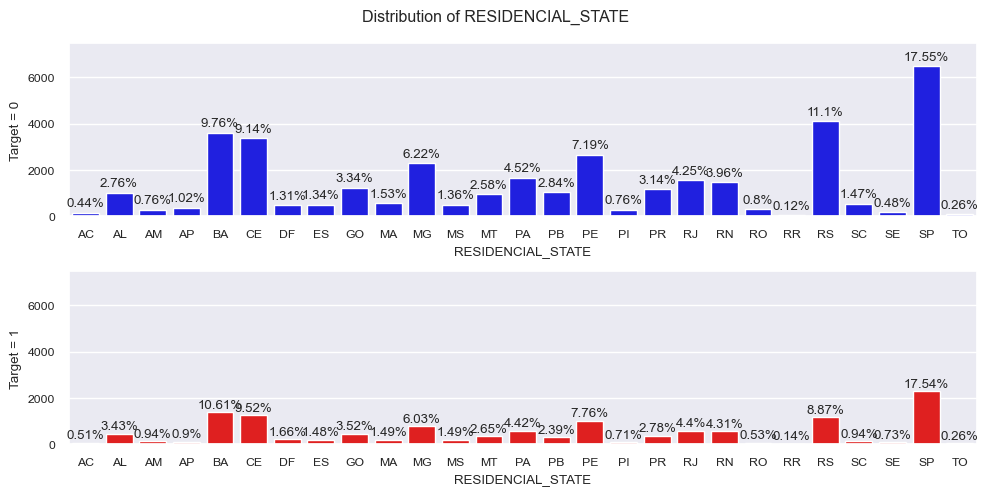

In [ ]:
# RESIDENCIAL_STATE: no changes 
plot.plotting_distribution_bar(app_train, "RESIDENCIAL_STATE", 'vertical') # before cleaning

TARGET_LABEL_BAD=1  FLAG_PROFESSIONAL_PHONE
0                   N                          27142
                    Y                           9817
1                   N                           9368
                    Y                           3673
dtype: int64


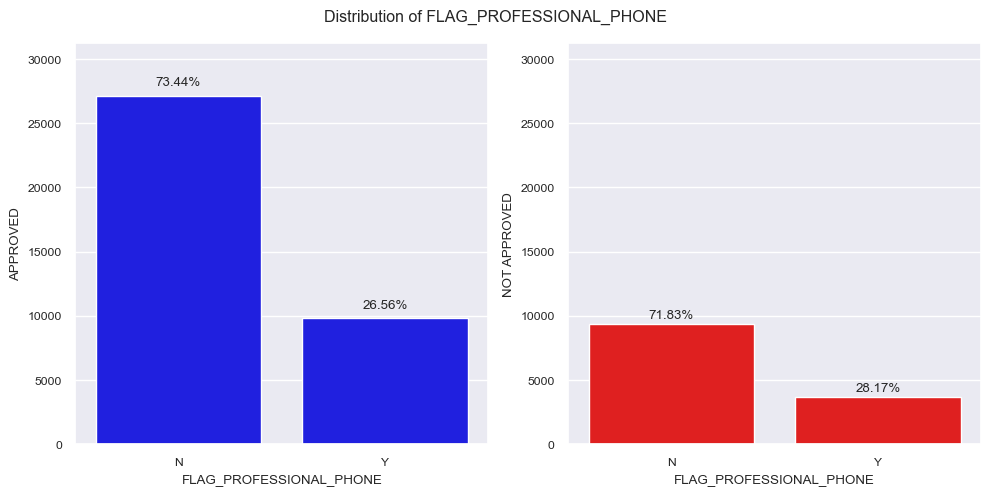

TARGET_LABEL_BAD=1  FLAG_PROFESSIONAL_PHONE
0                   N                          27142
                    Y                           9817
1                   N                           9368
                    Y                           3673
dtype: int64


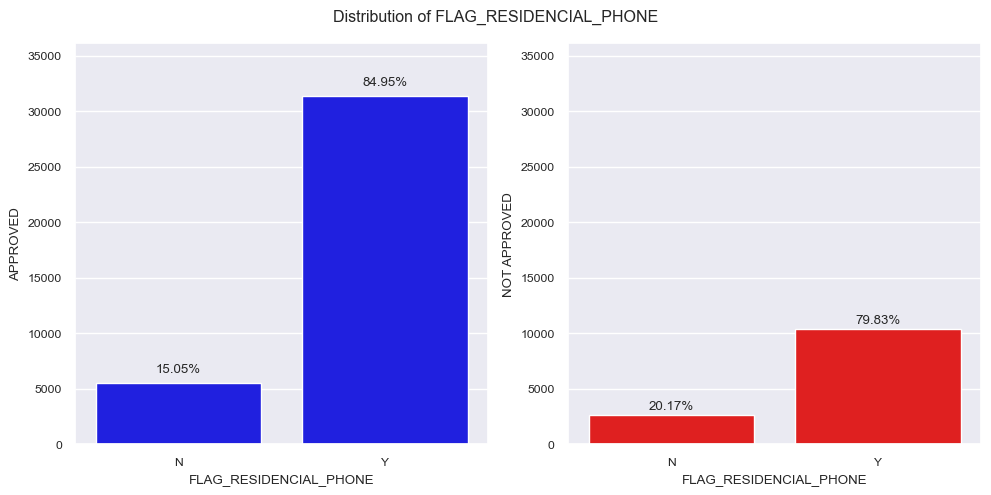

TARGET_LABEL_BAD=1  COMPANY
0                   N          20757
                    Y          16202
1                   N           7202
                    Y           5839
dtype: int64


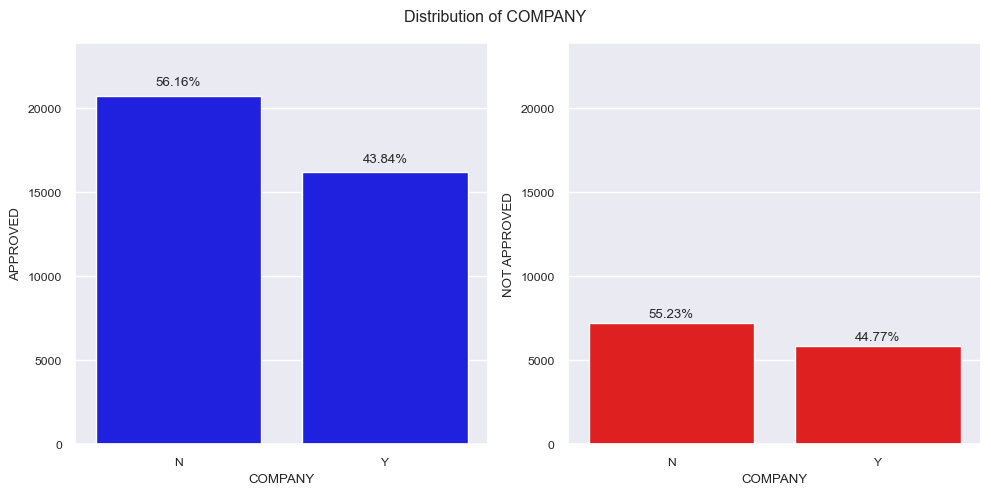

In [ ]:
# 'FLAG_PROFESSIONAL_PHONE': could be a good disparity to set if a person has a job
print(app_train[["TARGET_LABEL_BAD=1", "FLAG_PROFESSIONAL_PHONE"]].groupby(["TARGET_LABEL_BAD=1"]).value_counts())
plot.plotting_distribution_bar(app_train, "FLAG_PROFESSIONAL_PHONE", 'horizontal')

# 'FLAG_RESIDENCIAL_PHONE': could be a good disparity to set if a person has a phone at house
print(app_train[["TARGET_LABEL_BAD=1", "FLAG_PROFESSIONAL_PHONE"]].groupby(["TARGET_LABEL_BAD=1"]).value_counts())
plot.plotting_distribution_bar(app_train, "FLAG_RESIDENCIAL_PHONE", 'horizontal')

# 'COMPANY': not changes at all
print(app_train[["TARGET_LABEL_BAD=1", "COMPANY"]].groupby(["TARGET_LABEL_BAD=1"]).value_counts())
plot.plotting_distribution_bar(app_train, "COMPANY", 'horizontal')

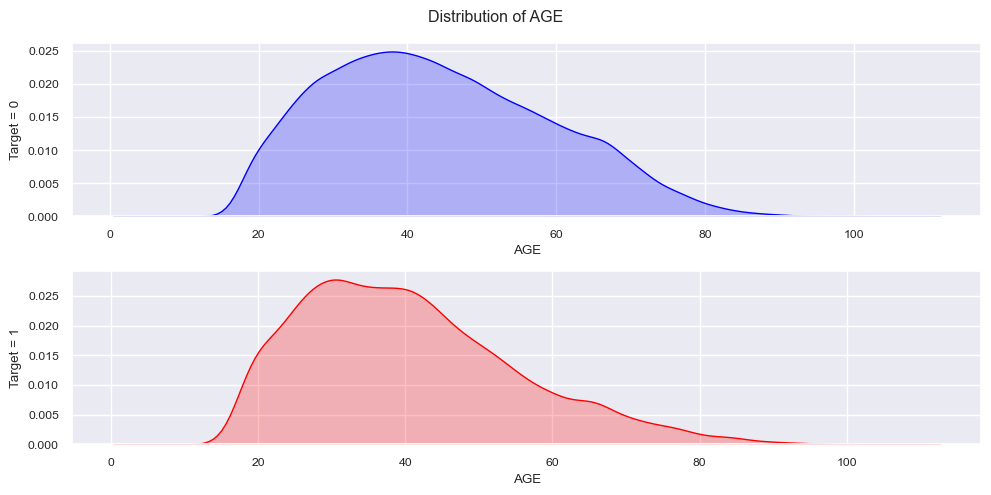

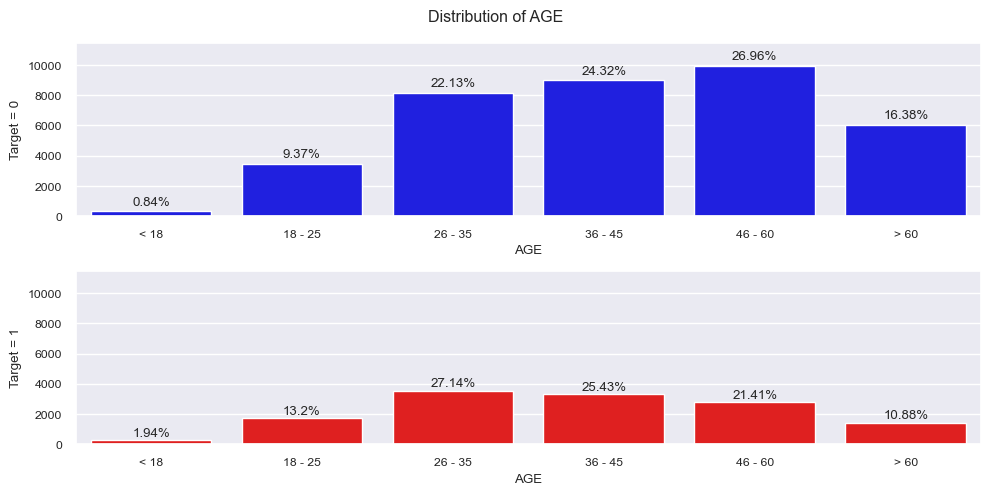

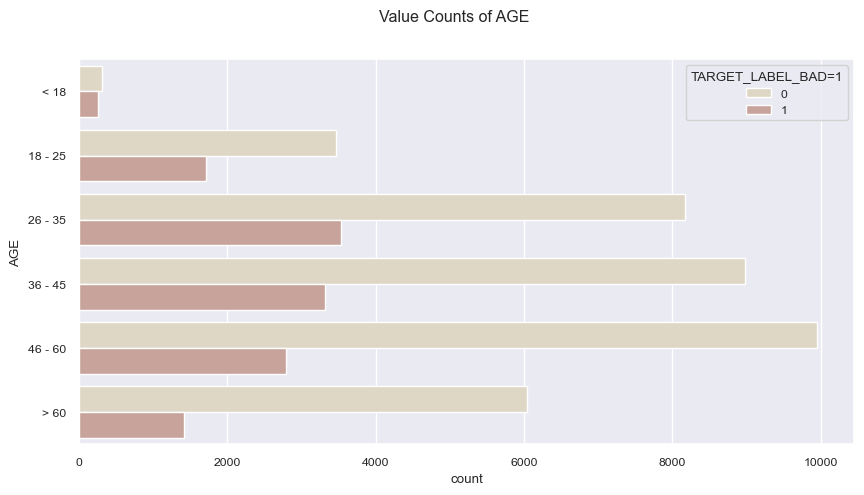

In [ ]:
# AGE: converted to categorical ['< 18', '18 - 25', '26 - 35', '36 - 45', '46 - 60', '> 60']
plot.plotting_distribution_kde(app_train, "AGE") # before cleaning

plot.plotting_distribution_bar(app_train_cop, "AGE") # before cleaning
plot.plot_value_counts(app_train_cop, "AGE") # before cleaning

#### Columns to delete for encoding.

In [101]:
app_normalized = preprocessing.delete_columns(app_train_cop)

Those columns were removed: 
 []

Those columns were not found: 
 ['ID_CLIENT', 'POSTAL_ADDRESS_TYPE', 'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'NACIONALITY', 'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'RESIDENCIAL_PHONE_AREA_CODE', 'RESIDENCE_TYPE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS', 'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'PROFESSIONAL_PHONE_AREA_CODE', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE', 'MATE_PROFESSION_CODE', 'MATE_EDUCATION_LEVEL', 'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3']


In [107]:
app_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49935 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   PAYMENT_DAY                  49935 non-null  category
 1   APPLICATION_SUBMISSION_TYPE  49935 non-null  category
 2   SEX                          49935 non-null  category
 3   MARITAL_STATUS               49935 non-null  category
 4   QUANT_DEPENDANTS             49935 non-null  category
 5   RESIDENCIAL_STATE            49935 non-null  category
 6   FLAG_RESIDENCIAL_PHONE       49935 non-null  category
 7   MONTHS_IN_RESIDENCE          49935 non-null  category
 8   FLAG_EMAIL                   49935 non-null  category
 9   COMPANY                      49935 non-null  category
 10  FLAG_PROFESSIONAL_PHONE      49935 non-null  category
 11  PRODUCT                      49935 non-null  category
 12  AGE                          49935 non-null  category
 13  T

In [53]:
colnames = app_train_cop.columns.to_list()
colnames_fixed = [colname[:-4] if colname[-4:]=="_tmp" else colname for colname in colnames ]
app_train_cop.columns = colnames_fixed

In [54]:
app_train_cop.head()

,SEX,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,COMPANY,FLAG_PROFESSIONAL_PHONE,AGE,TARGET_LABEL_BAD=1,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,MONTHLY_INCOMES_TOT,FLAG_CARDS,QUANT_BANKING_ACCOUNTS_TOT,PERSONAL_ASSETS_VALUE,QUANT_CARS
0,F,RN,Y,N,N,32.0,1,1 - 15,Other,1,owned,2,[650 - 1320],Y,N,N,N
1,F,RJ,Y,Y,N,34.0,1,1 - 15,married,0,owned,3,[650 - 1320],N,N,N,N
2,F,RN,Y,N,N,27.0,0,1 - 15,married,0,owned,0,[0 - 650],N,N,N,N
3,F,PE,N,N,N,61.0,0,16 - 30,married,0,other,0,[0 - 650],N,N,N,N
4,M,RJ,Y,N,N,48.0,1,1 - 15,married,0,owned,3,[650 - 1320],N,N,N,N


In [55]:
reload(preprocessing)
domain_categories = [
    "PAYMENT_DAY",
    "MARITAL_STATUS",
    "RESIDENCE_TYPE",
    "MONTHLY_INCOMES_TOT",
    "FLAG_CARDS",
    "QUANT_BANKING_ACCOUNTS_TOT",
    "PERSONAL_ASSETS_VALUE",
    "QUANT_CARS",
    "APPLICATION_SUBMISSION_TYPE",
    "SEX",
    "RESIDENCIAL_STATE",
    "FLAG_PROFESSIONAL_PHONE",
    "FLAG_RESIDENCIAL_PHONE",
    "COMPANY",
    "NACIONALITY"
]
list_not_find = []
list_categorized = []
for column_to_cat in domain_categories:
    if(column_to_cat in app_train_cop.columns):
        # print(column_to_cat)
        list_categorized.append(column_to_cat)
        preprocessing.cast_to_category(column_to_cat,app_train_cop)
    else:
        list_not_find.append(column_to_cat)
print("this columns were categorized: ",list_categorized)
print("this columns were not found: ",list_not_find)

PAYMENT_DAY: category
MARITAL_STATUS: category
RESIDENCE_TYPE: category
MONTHLY_INCOMES_TOT: category
FLAG_CARDS: category
QUANT_BANKING_ACCOUNTS_TOT: category
PERSONAL_ASSETS_VALUE: category
QUANT_CARS: category
SEX: category
RESIDENCIAL_STATE: category
FLAG_PROFESSIONAL_PHONE: category
FLAG_RESIDENCIAL_PHONE: category
COMPANY: category
this columns were categorized:  ['PAYMENT_DAY', 'MARITAL_STATUS', 'RESIDENCE_TYPE', 'MONTHLY_INCOMES_TOT', 'FLAG_CARDS', 'QUANT_BANKING_ACCOUNTS_TOT', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS', 'SEX', 'RESIDENCIAL_STATE', 'FLAG_PROFESSIONAL_PHONE', 'FLAG_RESIDENCIAL_PHONE', 'COMPANY']
this columns were not found:  ['APPLICATION_SUBMISSION_TYPE', 'NACIONALITY']


In [56]:
app_train_cop.head()

,SEX,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,COMPANY,FLAG_PROFESSIONAL_PHONE,AGE,TARGET_LABEL_BAD=1,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,MONTHLY_INCOMES_TOT,FLAG_CARDS,QUANT_BANKING_ACCOUNTS_TOT,PERSONAL_ASSETS_VALUE,QUANT_CARS
0,F,RN,Y,N,N,32.0,1,1 - 15,Other,1,owned,2,[650 - 1320],Y,N,N,N
1,F,RJ,Y,Y,N,34.0,1,1 - 15,married,0,owned,3,[650 - 1320],N,N,N,N
2,F,RN,Y,N,N,27.0,0,1 - 15,married,0,owned,0,[0 - 650],N,N,N,N
3,F,PE,N,N,N,61.0,0,16 - 30,married,0,other,0,[0 - 650],N,N,N,N
4,M,RJ,Y,N,N,48.0,1,1 - 15,married,0,owned,3,[650 - 1320],N,N,N,N


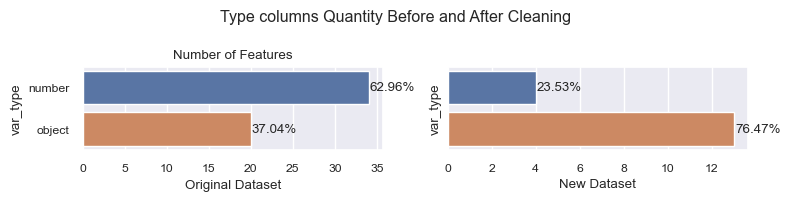

In [57]:
# show number of columns per data type
plot.plot_number_columns_type(app_train_cop, app_train)

In [58]:
app_train_cop.head()

,SEX,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,COMPANY,FLAG_PROFESSIONAL_PHONE,AGE,TARGET_LABEL_BAD=1,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,MONTHLY_INCOMES_TOT,FLAG_CARDS,QUANT_BANKING_ACCOUNTS_TOT,PERSONAL_ASSETS_VALUE,QUANT_CARS
0,F,RN,Y,N,N,32.0,1,1 - 15,Other,1,owned,2,[650 - 1320],Y,N,N,N
1,F,RJ,Y,Y,N,34.0,1,1 - 15,married,0,owned,3,[650 - 1320],N,N,N,N
2,F,RN,Y,N,N,27.0,0,1 - 15,married,0,owned,0,[0 - 650],N,N,N,N
3,F,PE,N,N,N,61.0,0,16 - 30,married,0,other,0,[0 - 650],N,N,N,N
4,M,RJ,Y,N,N,48.0,1,1 - 15,married,0,owned,3,[650 - 1320],N,N,N,N


In [59]:
# order target at the final of dataset
preprocessing.move_target_end(app_train_cop)

In [60]:
app_train_cop.head()

,SEX,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,COMPANY,FLAG_PROFESSIONAL_PHONE,AGE,TARGET_LABEL_BAD=1,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,MONTHLY_INCOMES_TOT,FLAG_CARDS,QUANT_BANKING_ACCOUNTS_TOT,PERSONAL_ASSETS_VALUE,QUANT_CARS
0,F,RN,Y,N,N,32.0,1,1 - 15,Other,1,owned,2,[650 - 1320],Y,N,N,N
1,F,RJ,Y,Y,N,34.0,1,1 - 15,married,0,owned,3,[650 - 1320],N,N,N,N
2,F,RN,Y,N,N,27.0,0,1 - 15,married,0,owned,0,[0 - 650],N,N,N,N
3,F,PE,N,N,N,61.0,0,16 - 30,married,0,other,0,[0 - 650],N,N,N,N
4,M,RJ,Y,N,N,48.0,1,1 - 15,married,0,owned,3,[650 - 1320],N,N,N,N


In [61]:
app_train_cop.columns

Index(['SEX', 'RESIDENCIAL_STATE', 'FLAG_RESIDENCIAL_PHONE', 'COMPANY',
       'FLAG_PROFESSIONAL_PHONE', 'AGE', 'TARGET_LABEL_BAD=1', 'PAYMENT_DAY',
       'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'RESIDENCE_TYPE',
       'MONTHS_IN_RESIDENCE', 'MONTHLY_INCOMES_TOT', 'FLAG_CARDS',
       'QUANT_BANKING_ACCOUNTS_TOT', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS'],
      dtype='object')

#### Normalization, Impute, Encoding

1. Standarization using pipelines


In [62]:
reload(data_utils)
reload(evaluation)

<module 'helper_functions.evaluation' from 'c:\\Users\\Yessid\\Desktop\\anyoneai\\credit-risk-analysis\\src\\notebooks\\..\\helper_functions\\evaluation.py'>

In [63]:
app_train_cop

,SEX,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,COMPANY,FLAG_PROFESSIONAL_PHONE,AGE,TARGET_LABEL_BAD=1,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,MONTHLY_INCOMES_TOT,FLAG_CARDS,QUANT_BANKING_ACCOUNTS_TOT,PERSONAL_ASSETS_VALUE,QUANT_CARS
0,F,RN,Y,N,N,32.0,1,1 - 15,Other,1,owned,2,[650 - 1320],Y,N,N,N
1,F,RJ,Y,Y,N,34.0,1,1 - 15,married,0,owned,3,[650 - 1320],N,N,N,N
2,F,RN,Y,N,N,27.0,0,1 - 15,married,0,owned,0,[0 - 650],N,N,N,N
3,F,PE,N,N,N,61.0,0,16 - 30,married,0,other,0,[0 - 650],N,N,N,N
4,M,RJ,Y,N,N,48.0,1,1 - 15,married,0,owned,3,[650 - 1320],N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,F,RN,Y,N,N,36.0,1,1 - 15,single,2,owned,2,[1320 - 3323],N,N,N,Y
49996,F,SP,Y,N,N,21.0,0,16 - 30,single,0,owned,2,[0 - 650],N,N,N,N
49997,M,SP,Y,Y,Y,41.0,0,1 - 15,married,3,mortgage,3,[1320 - 3323],N,N,N,N
49998,F,MG,Y,Y,Y,28.0,1,1 - 15,single,1,owned,0,[1320 - 3323],N,N,N,N


In [64]:
# first split in sets
app_train_set, app_val_set, app_test_set = data_utils.get_feature_in_set(app_train_cop)

In [65]:
app_train_set

,SEX,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,COMPANY,FLAG_PROFESSIONAL_PHONE,AGE,TARGET_LABEL_BAD=1,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,MONTHLY_INCOMES_TOT,FLAG_CARDS,QUANT_BANKING_ACCOUNTS_TOT,PERSONAL_ASSETS_VALUE,QUANT_CARS
26618,F,PB,Y,N,N,54.0,0,1 - 15,married,0,owned,3,[650 - 1320],N,N,N,N
14544,M,BA,Y,Y,Y,25.0,1,1 - 15,single,0,owned,3,[0 - 650],N,N,N,Y
30769,M,PR,Y,N,N,51.0,0,1 - 15,married,1,owned,3,[650 - 1320],N,N,N,N
3452,M,PE,Y,N,N,41.0,1,16 - 30,married,1,other,3,[0 - 650],N,N,N,N
20316,F,CE,Y,N,N,80.0,0,1 - 15,Other,0,owned,2,[0 - 650],N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,M,PE,Y,Y,N,39.0,0,16 - 30,married,3,owned,3,[0 - 650],N,N,N,N
6333,M,BA,N,N,N,54.0,0,1 - 15,single,0,owned,3,[0 - 650],N,N,N,N
25053,F,RS,N,Y,Y,23.0,1,16 - 30,single,0,owned,3,[0 - 650],N,N,Y,Y
2063,M,SP,Y,N,N,42.0,0,16 - 30,married,0,owned,3,[650 - 1320],Y,N,N,N


In [66]:
app_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35953 entries, 26618 to 788
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   SEX                         35953 non-null  category
 1   RESIDENCIAL_STATE           35953 non-null  category
 2   FLAG_RESIDENCIAL_PHONE      35953 non-null  category
 3   COMPANY                     35953 non-null  category
 4   FLAG_PROFESSIONAL_PHONE     35953 non-null  category
 5   AGE                         35953 non-null  float64 
 6   TARGET_LABEL_BAD=1          35953 non-null  int64   
 7   PAYMENT_DAY                 35953 non-null  category
 8   MARITAL_STATUS              35953 non-null  category
 9   QUANT_DEPENDANTS            35953 non-null  int64   
 10  RESIDENCE_TYPE              35953 non-null  category
 11  MONTHS_IN_RESIDENCE         35953 non-null  int32   
 12  MONTHLY_INCOMES_TOT         35953 non-null  category
 13  FLAG_CARDS    

In [67]:
app_train_set.select_dtypes(exclude="number").columns

Index(['SEX', 'RESIDENCIAL_STATE', 'FLAG_RESIDENCIAL_PHONE', 'COMPANY',
       'FLAG_PROFESSIONAL_PHONE', 'PAYMENT_DAY', 'MARITAL_STATUS',
       'RESIDENCE_TYPE', 'MONTHLY_INCOMES_TOT', 'FLAG_CARDS',
       'QUANT_BANKING_ACCOUNTS_TOT', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS'],
      dtype='object')

In [68]:
app_train_set.select_dtypes(include="number").columns

Index(['AGE', 'TARGET_LABEL_BAD=1', 'QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE'], dtype='object')

In [69]:
# second apply preprocess in sets
train_prep, val_prep, test_prep = data_utils.preprocess_data(app_train_set,app_val_set,app_test_set)

Input train data shape:  (35953, 17)
Input val data shape:  (3995, 17)
Input test data shape:  (9987, 17) 

cat_cols:  Index(['SEX', 'RESIDENCIAL_STATE', 'FLAG_RESIDENCIAL_PHONE', 'COMPANY',
       'FLAG_PROFESSIONAL_PHONE', 'PAYMENT_DAY', 'MARITAL_STATUS',
       'RESIDENCE_TYPE', 'MONTHLY_INCOMES_TOT', 'FLAG_CARDS',
       'QUANT_BANKING_ACCOUNTS_TOT', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS'],
      dtype='object')
['AGE', 'TARGET_LABEL_BAD=1', 'QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE']
Index(['SEX', 'FLAG_RESIDENCIAL_PHONE', 'COMPANY', 'FLAG_PROFESSIONAL_PHONE',
       'PAYMENT_DAY', 'FLAG_CARDS', 'QUANT_BANKING_ACCOUNTS_TOT',
       'PERSONAL_ASSETS_VALUE', 'QUANT_CARS'],
      dtype='object')
Index(['RESIDENCIAL_STATE', 'MARITAL_STATUS', 'RESIDENCE_TYPE',
       'MONTHLY_INCOMES_TOT'],
      dtype='object')


In [70]:
train_prep[0,:]

array([ 0.59090909,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [71]:
# third split features and target 
X_train, y_train, X_val, y_val, X_test,y_test = data_utils.get_feature_target(train_prep, val_prep, test_prep)

#### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression


In [73]:
# logistic regression
clf = LogisticRegression(max_iter=200).fit(X_train, y_train.ravel())
print("model score: %.5f" % clf.score(X_val, y_val))
clf_preds = clf.predict(X_test)

model score: 0.66683


In [74]:
# # logistic regression
# clf = LogisticRegression(max_iter=200).fit(X_train, y_train.ravel())
# print("model score: %.3f" % clf.score(X_val, y_val))
# clf_preds = clf.predict(X_test)

Model Performance metrics:
------------------------------
Accuracy: 0.6658656253129068
Precision: 0.6731924590843174
Recall: 0.9727585690764855
F1 Score: 0.7957147229874503

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.67      0.97      0.80      6681
           1       0.45      0.05      0.08      3306

    accuracy                           0.67      9987
   macro avg       0.56      0.51      0.44      9987
weighted avg       0.60      0.67      0.56      9987


Prediction Confusion Matrix:
------------------------------
      0    1
0  6499  182
1  3155  151


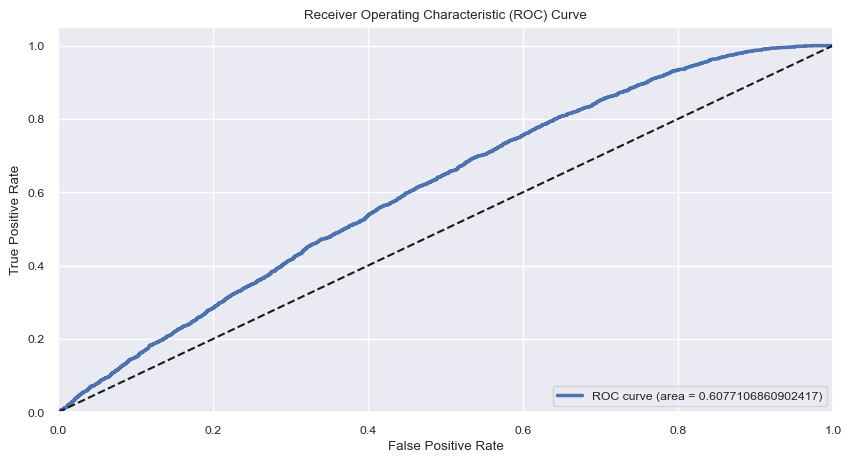

0.6077106860902417

In [75]:
accuracy = evaluation.get_performance(clf_preds, y_test)
evaluation.plot_roc(clf, y_test, X_test)

In [76]:
# accuracy = evaluation.get_performance(clf_preds, y_test)
# evaluation.plot_roc(clf, y_test, X_test)

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions,n_iter=2)
clf.fit(X_train, y_train.ravel())
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_penalty',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [78]:
res_logistic = pd.DataFrame(clf.cv_results_)
res_logistic

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.566604,0.226212,0.006134,0.000782,1.717428,l2,"{'C': 1.717427723705323, 'penalty': 'l2'}",0.663468,0.66319,0.662634,0.664395,0.659944,0.662726,0.001503,2
1,2.173770,0.487354,0.005611,0.001565,2.219681,l2,"{'C': 2.2196807073443754, 'penalty': 'l2'}",0.663329,0.66319,0.662634,0.664673,0.659944,0.662754,0.001556,1


In [79]:
# logistic regression
clf = LogisticRegression(solver='saga',C=2,tol=1e-2, max_iter=200).fit(X_train, y_train.ravel())
print("model score: %.3f" % clf.score(X_val, y_val))
clf_preds = clf.predict(X_test)

model score: 0.667


In [80]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# #class_weight={0:1, 1:3}
# clfr = RandomForestClassifier(class_weight={0:1, 1:3})
# distributions = dict(n_estimators=list(range(100,150,10)),max_depth=list(range(1,100,10)))
# clfr = RandomizedSearchCV(clfr, distributions,cv=3,n_iter=9)
# clfr.fit(X_train, y_train.ravel())
# print("model score: %.3f" % clfr.score(X_val, y_val))

In [81]:
res_logistic = pd.DataFrame(clfr.cv_results_)
res_logistic

NameError: name 'clfr' is not defined

In [ ]:
clfr.best_score_ #train

0.9380024313695783

In [ ]:
clfr.score(X_val, y_val)

0.9439299123904881

In [ ]:
clfr.best_estimator_.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=11,
                       n_estimators=120)>

In [ ]:
clfr_preds = clfr.predict(X_test)

Model Performance metrics:
------------------------------
Accuracy: 0.9390207269450286
Precision: 0.9914211719002913
Recall: 0.9167789253105822
F1 Score: 0.9526401741970605

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      6681
           1       0.85      0.98      0.91      3306

    accuracy                           0.94      9987
   macro avg       0.92      0.95      0.93      9987
weighted avg       0.95      0.94      0.94      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  6125   556
1    53  3253


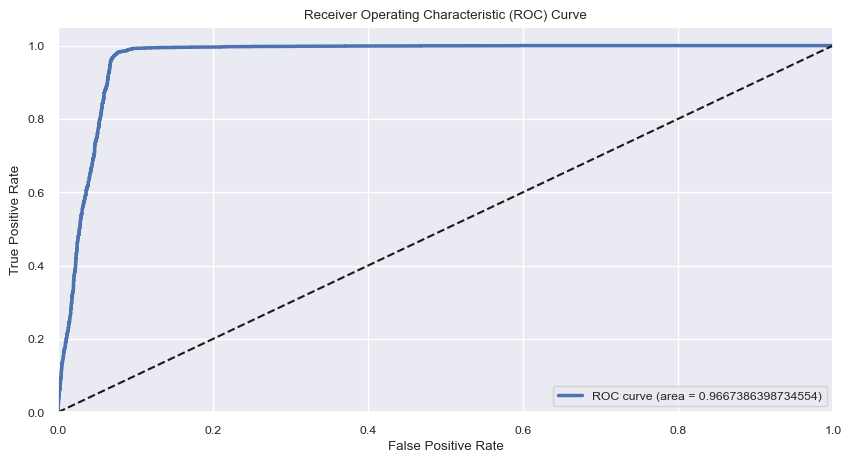

0.9667386398734554

In [ ]:
accuracy = evaluation.get_performance(clfr_preds, y_test)
evaluation.plot_roc(clfr, y_test, X_test)